In [1]:
import vnstock as vn
import ta
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
RSI_PERIOD = 14
RSI_OVERSOLD = 30
RSI_OVERBOUGHT = 70
MACD_FAST_PERIOD = 8
MACD_SLOW_PERIOD = 21
MACD_SIGNAL_PERIOD = 5

In [4]:
def calculate_indicators(df):
    if df.empty:
        return df
    
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], RSI_PERIOD).rsi()
    df['Previous_RSI'] = df['RSI'].shift(1)
    df['Previous_RSI'].fillna(0, inplace=True)
    macd = ta.trend.MACD(df['close'], window_slow=MACD_SLOW_PERIOD, window_fast=MACD_FAST_PERIOD, window_sign=MACD_SIGNAL_PERIOD)
    df['MACD'] = macd.macd()
    df['MACD_signal'] = macd.macd_signal()

    return df

In [5]:
def generate_signals(df):
    if df.empty:
        return df
    
    df['Signal'] = 0  

    # Buy signal: RSI across 30 and MACD > MACD Signal
    df.loc[(
        df['Previous_RSI'] < RSI_OVERSOLD) 
           & (df['RSI'] >= RSI_OVERSOLD)
              & (df['MACD'] > df['MACD_signal']), 'Signal'] = 1

    # Sell signal: RSI across 70 and MACD < MACD Signal
    df.loc[(df['Previous_RSI'] > RSI_OVERBOUGHT) 
           & (df['RSI'] <= RSI_OVERBOUGHT)
           & (df['MACD'] < df['MACD_signal']), 'Signal'] = -1

    return df

In [6]:
def backtest_strategy(df, initial_balance=160000000):
    if df.empty:
        return df
    
    balance = initial_balance
    shares = 0
    df['Portfolio Value'] = balance
    df['Shares'] = 0


    for i in range(1, len(df)):
        if df['Signal'].iloc[i] == 1:  # Buy signal
            if balance > 0: 
                shares_to_buy = balance // df['close'].iloc[i]
                balance -= shares_to_buy * df['close'].iloc[i]
                shares += shares_to_buy


        elif df['Signal'].iloc[i] == -1 and shares > 0:  # Sell signal
            balance += shares * df['close'].iloc[i]
            shares = 0

        df.loc[i, 'Portfolio Value'] = balance + shares * df['close'].iloc[i]
        df.loc[i, 'Shares'] = shares

    df.loc[len(df) - 1, 'Portfolio Value'] = balance + shares * df['close'].iloc[-1]

    return df

In [7]:
def visualize_results(df, symbol):
    plt.figure(figsize=(14, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['close'], label='Close Price')
    plt.plot(df.loc[df['Signal'] == 1].index, df['close'][df['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(df.loc[df['Signal'] == -1].index, df['close'][df['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
    plt.title(f'{symbol} Price Chart')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['Portfolio Value'], label='Portfolio Value', color='b')
    plt.title(f'{symbol} Portfolio Value Over Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['Shares'], label='Shares Held', color='purple')
    plt.title(f'{symbol} Shares Held Over Time')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [8]:
def calculate_profit_total(df, initial_balance=160000000):
    if df.empty:
        return 0
    final_balance = df['Portfolio Value'].iloc[-1] 
    total_change = ((final_balance - initial_balance)/initial_balance) * 100
    return total_change

In [9]:
def test_company(symbol, start_date, end_date, resolution='1D', type='stock'):
    df = vn.stock_historical_data(symbol=symbol, 
                            start_date=start_date, 
                            end_date=end_date, resolution=resolution, type=type)
    if df.empty:
        return 0 
    df = calculate_indicators(df)
    df = generate_signals(df)
    df = backtest_strategy(df)
    visualize_results(df, symbol)
    total_profit_change = calculate_profit_total(df, initial_balance=160000000)
        
    return total_profit_change

In [10]:
START_DATE = '2021-01-01'
END_DATE = '2024-01-01'

In [11]:
VN30_list =  [
    'SSI', 'BCM','VHM','VIC','VRE','BVH','POW','GAS','ACB','BID',
'CTG','HDB','MBB','SSB','SHB','STB','TCB','TPB','VCB','VIB','VPB','HPG',
'GVR','MSN','VNM','SAB','VJC','MWG','PLX','FPT']

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


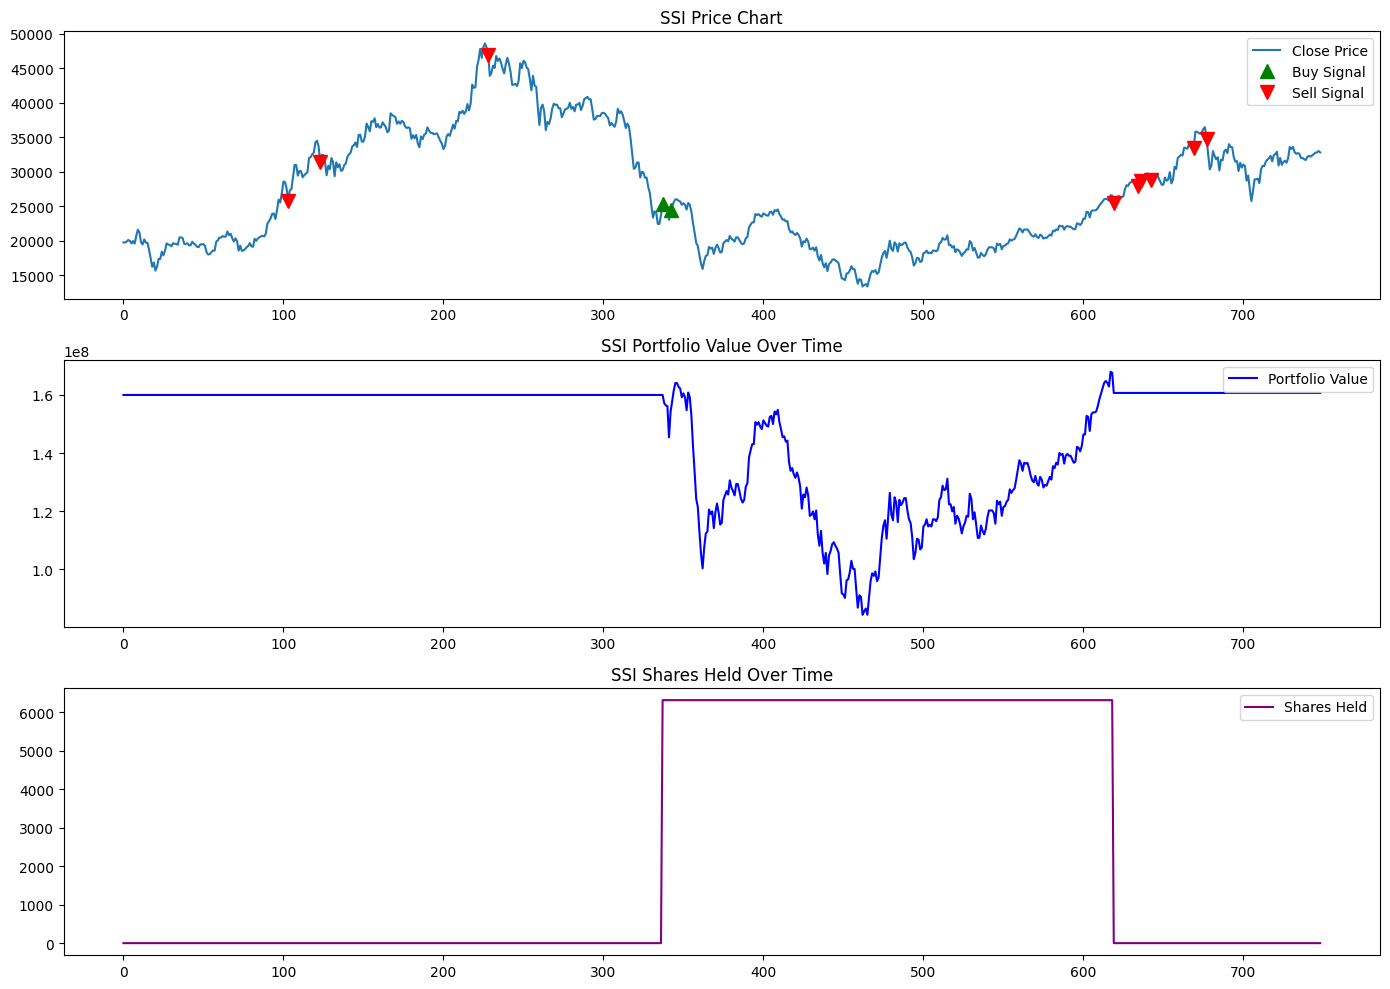

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


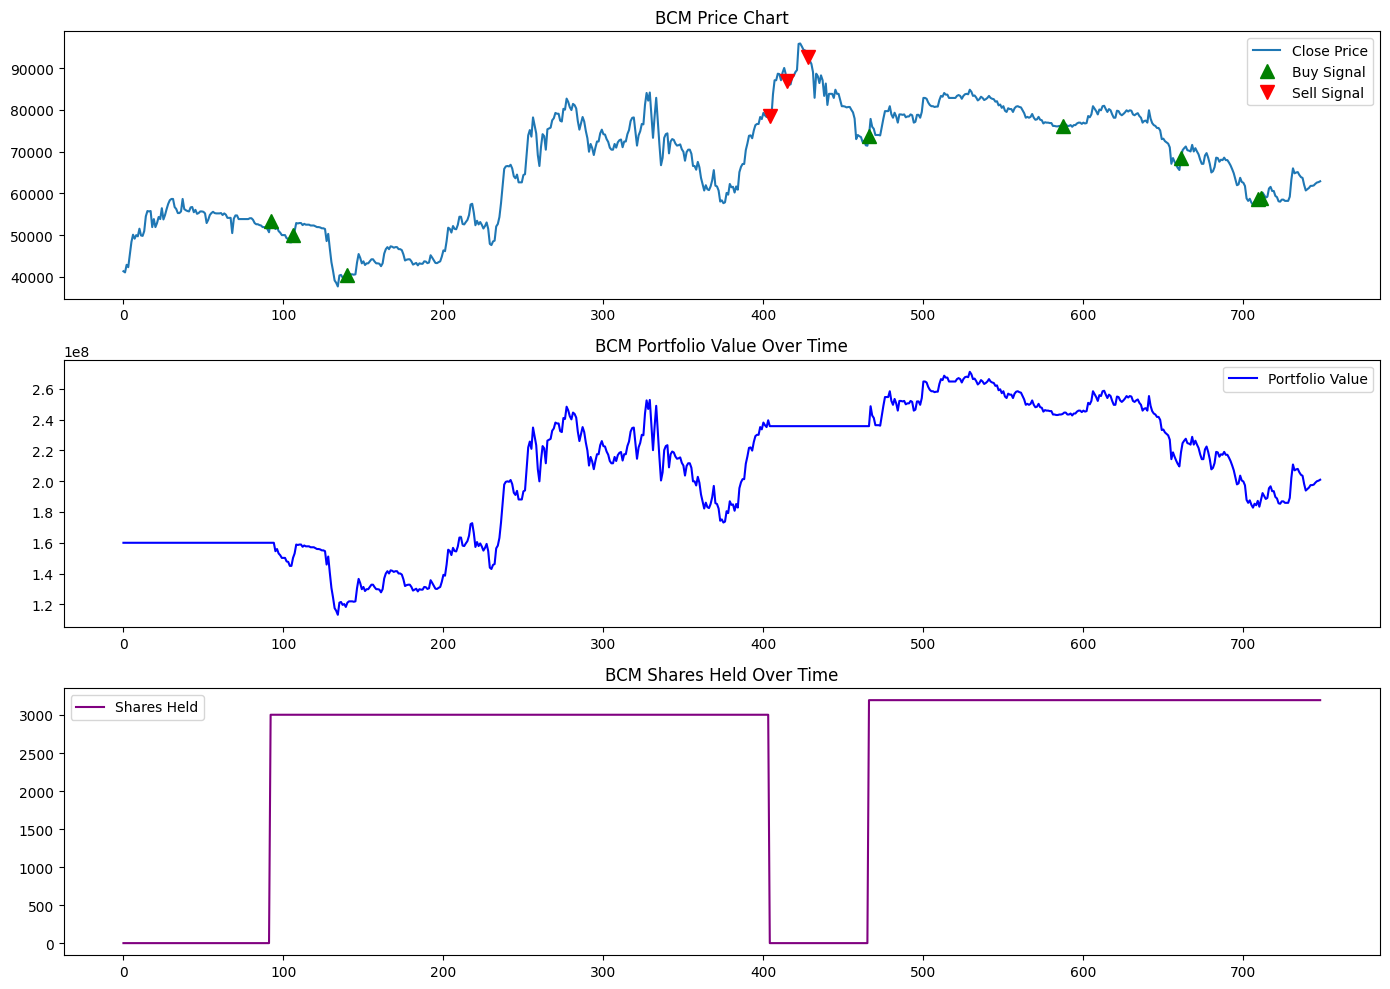

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


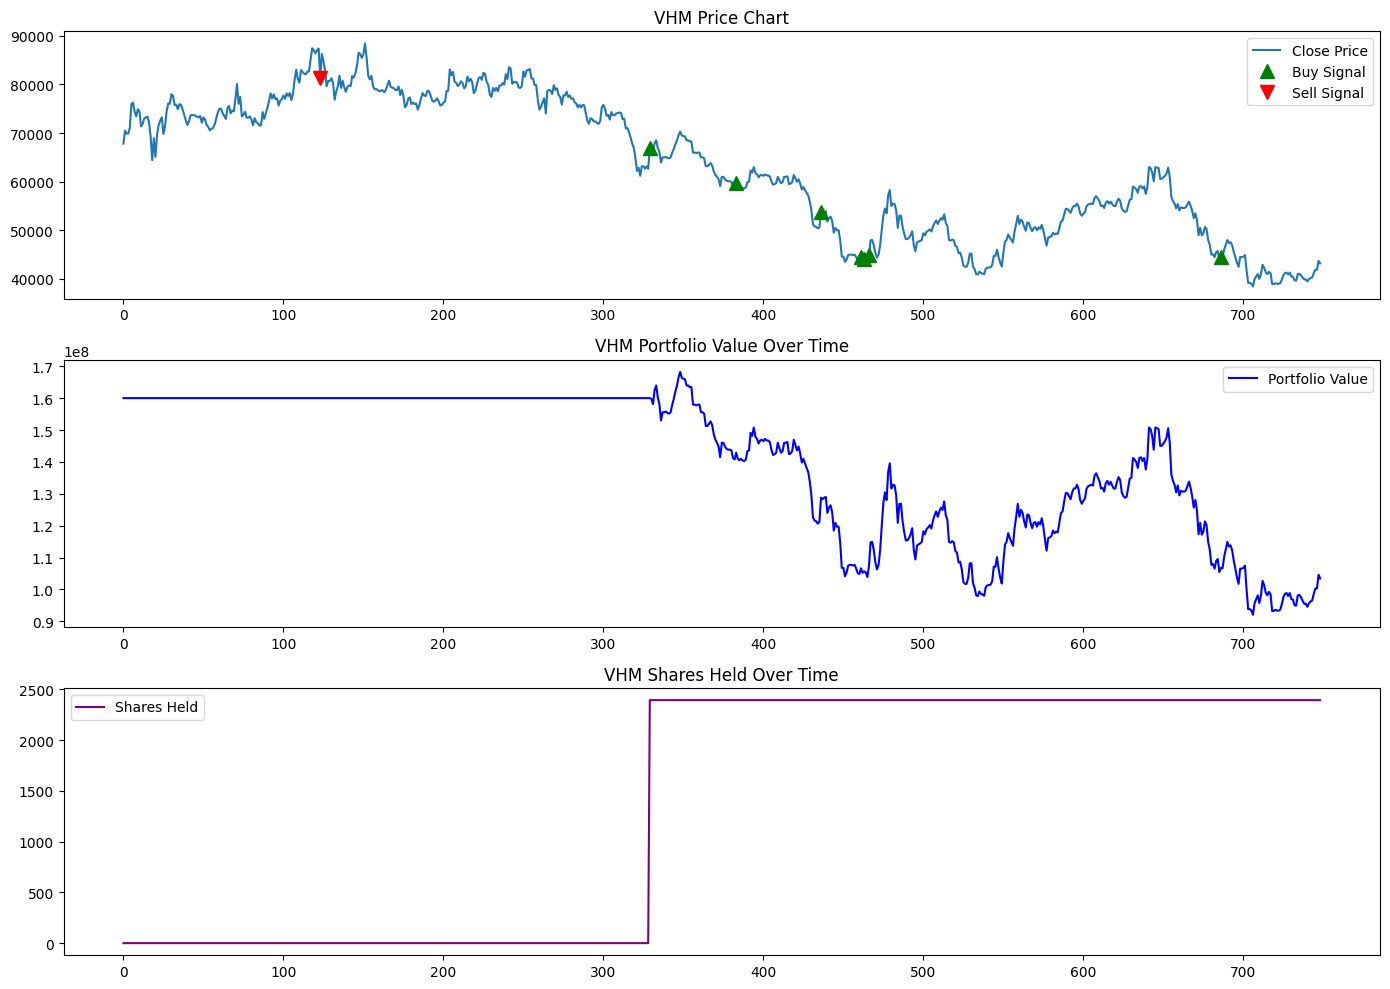

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


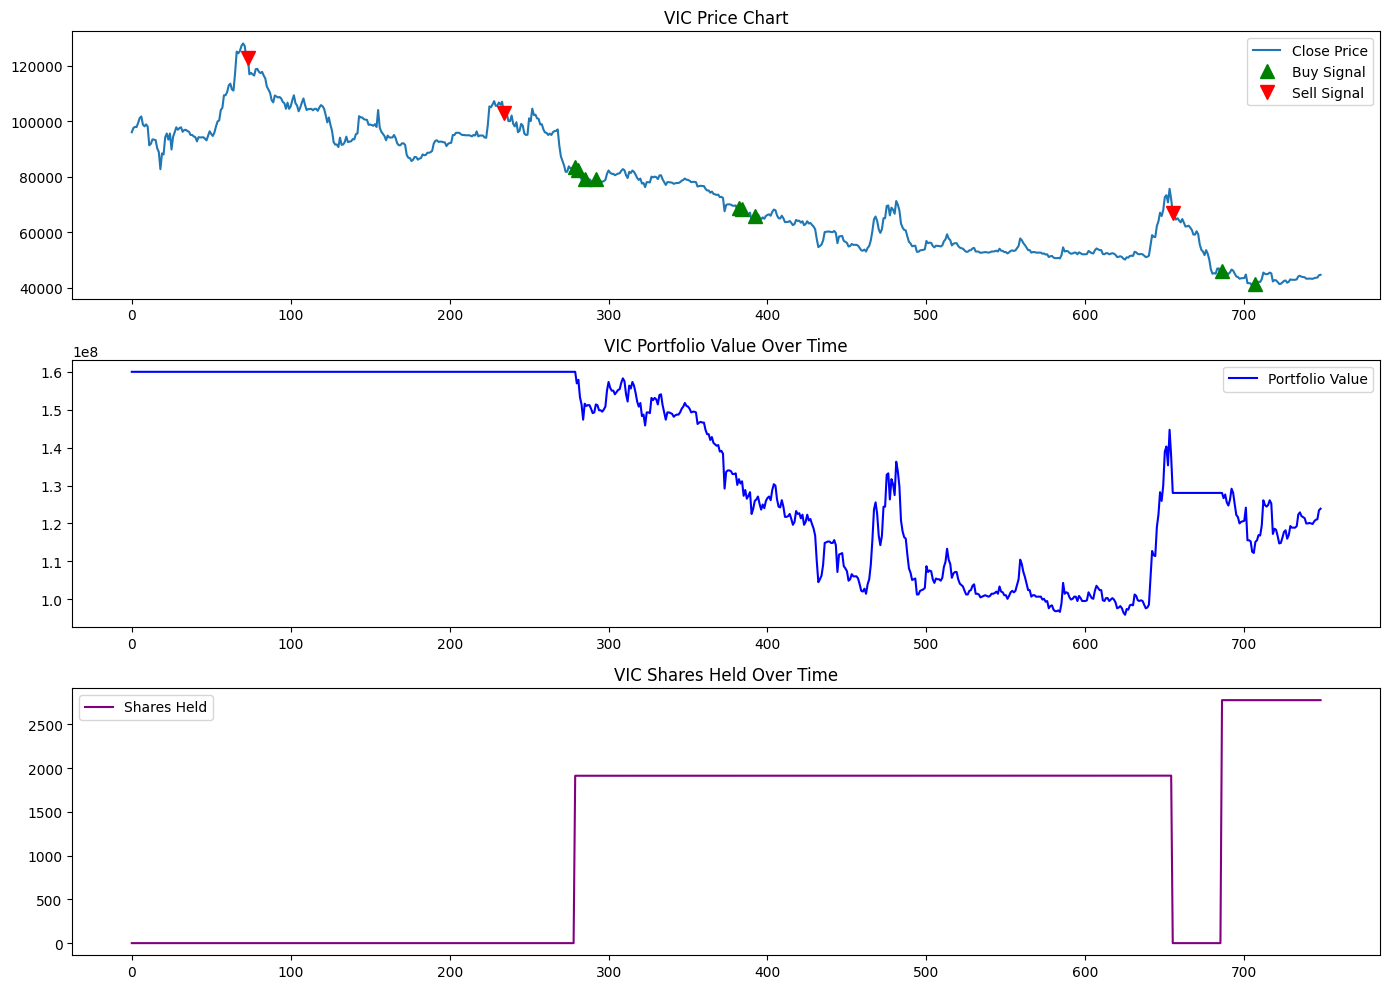

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


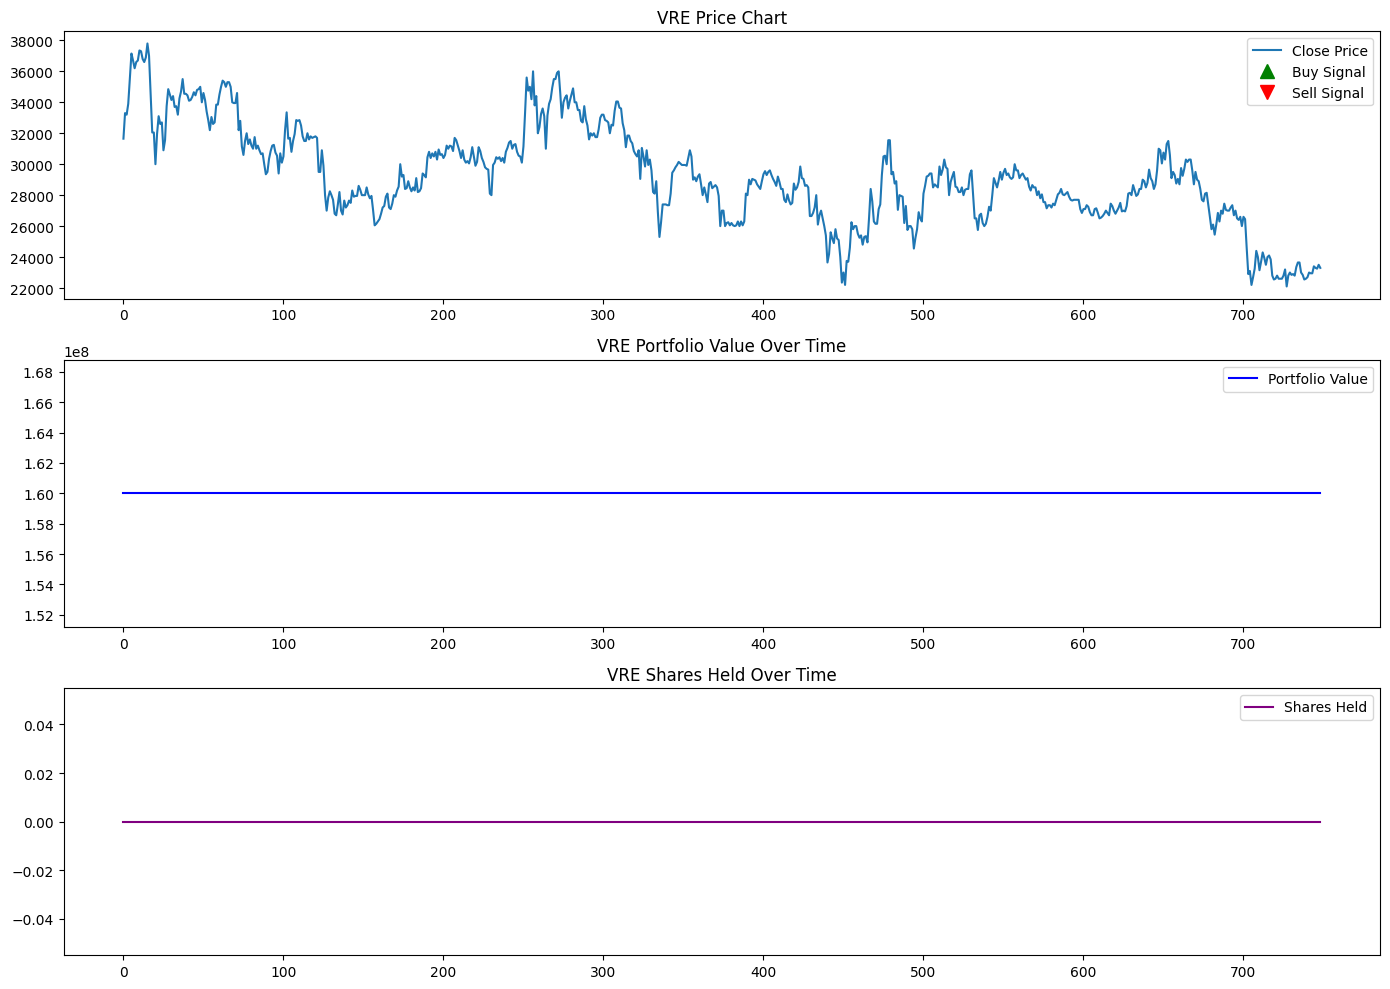

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


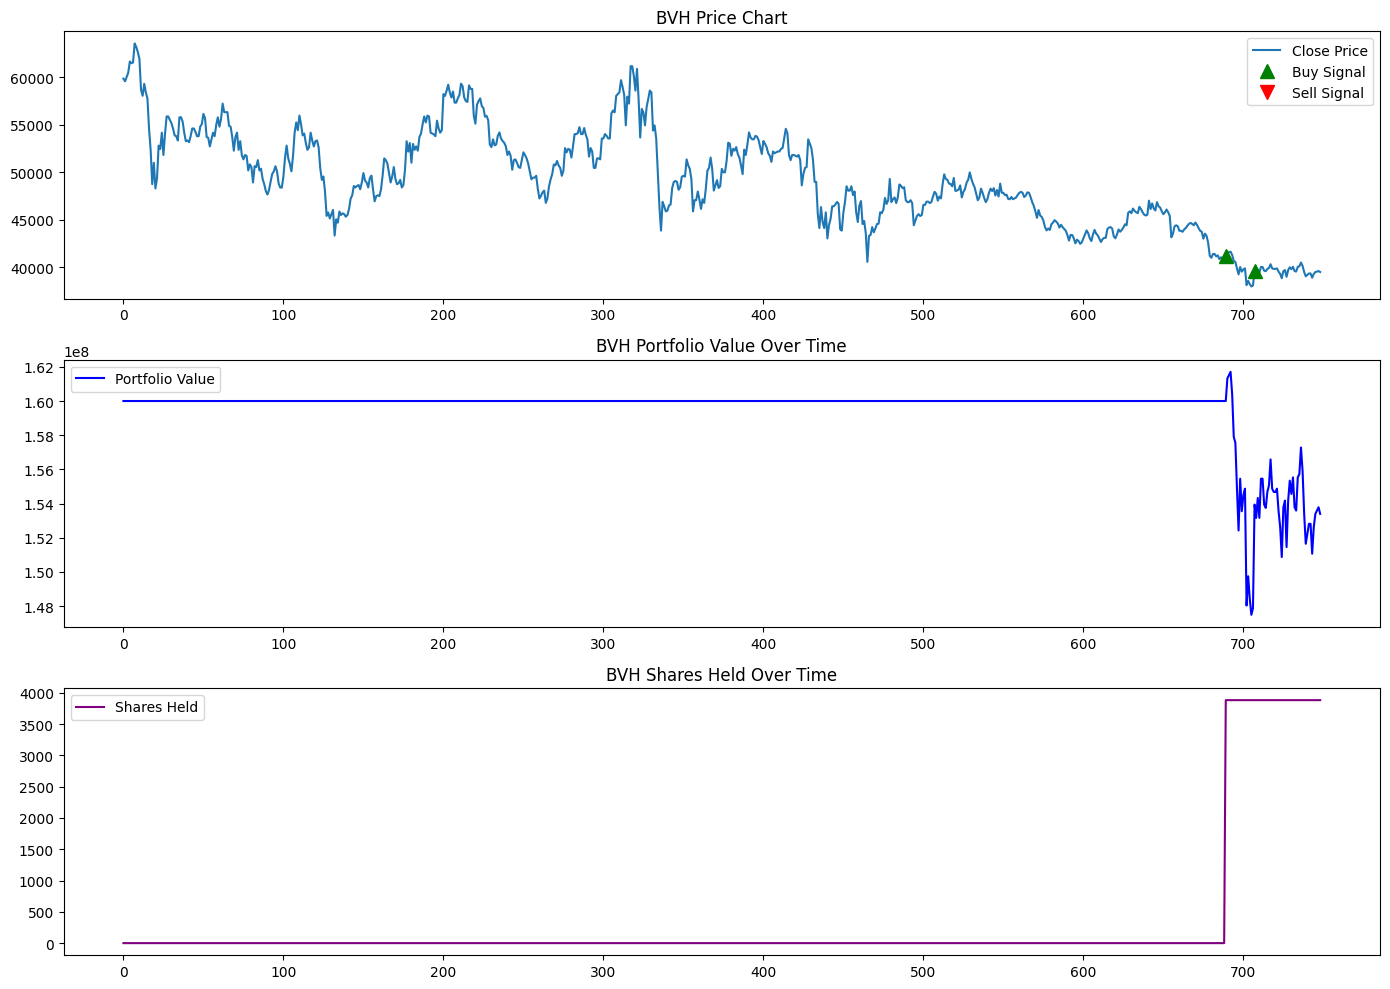

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


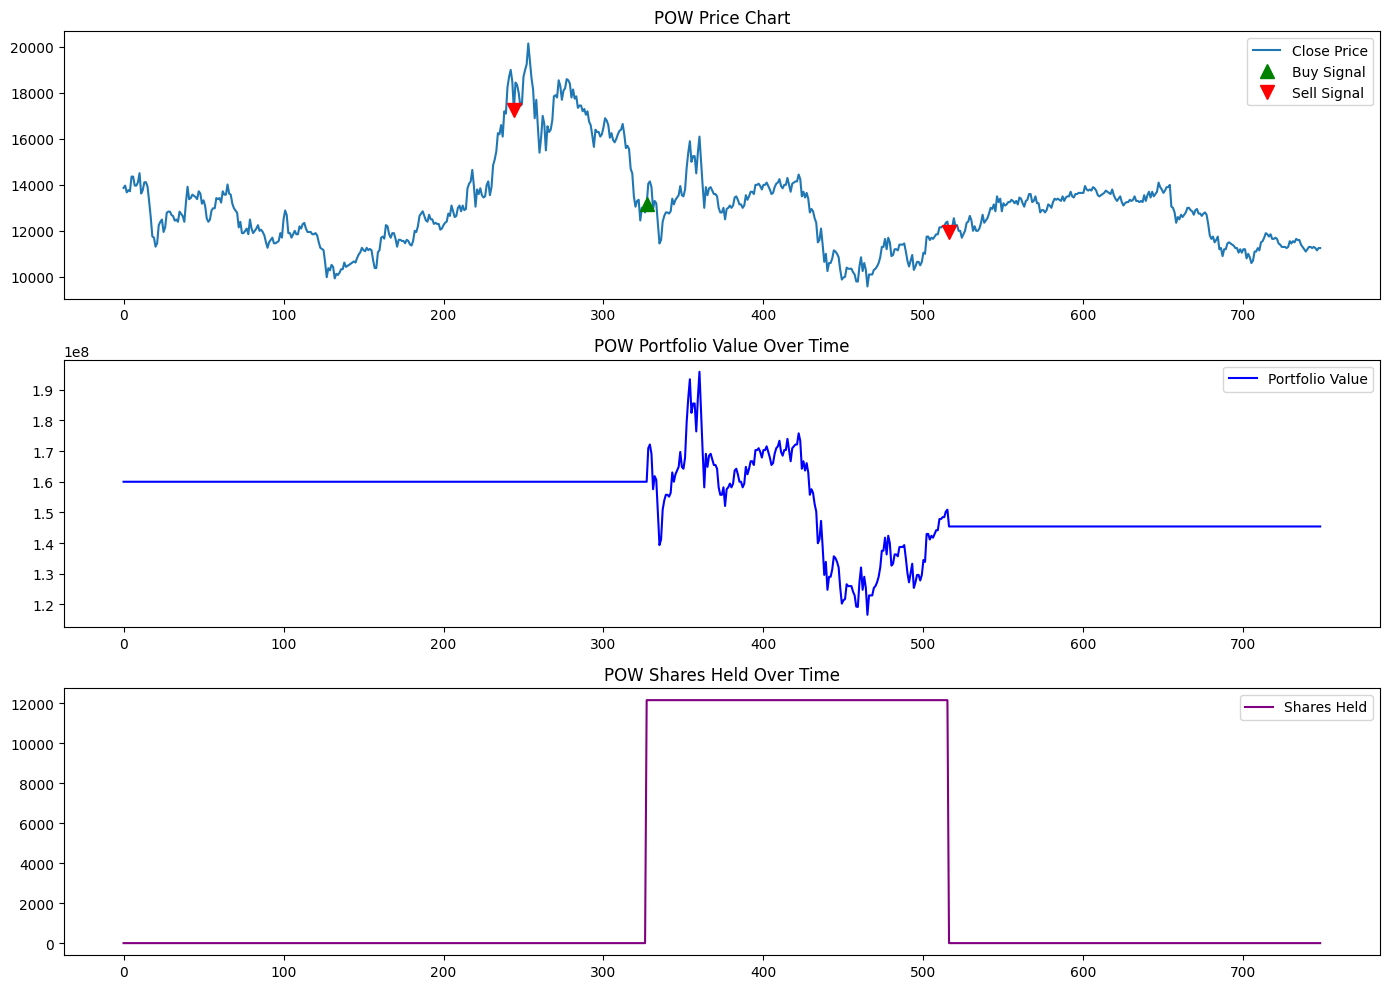

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


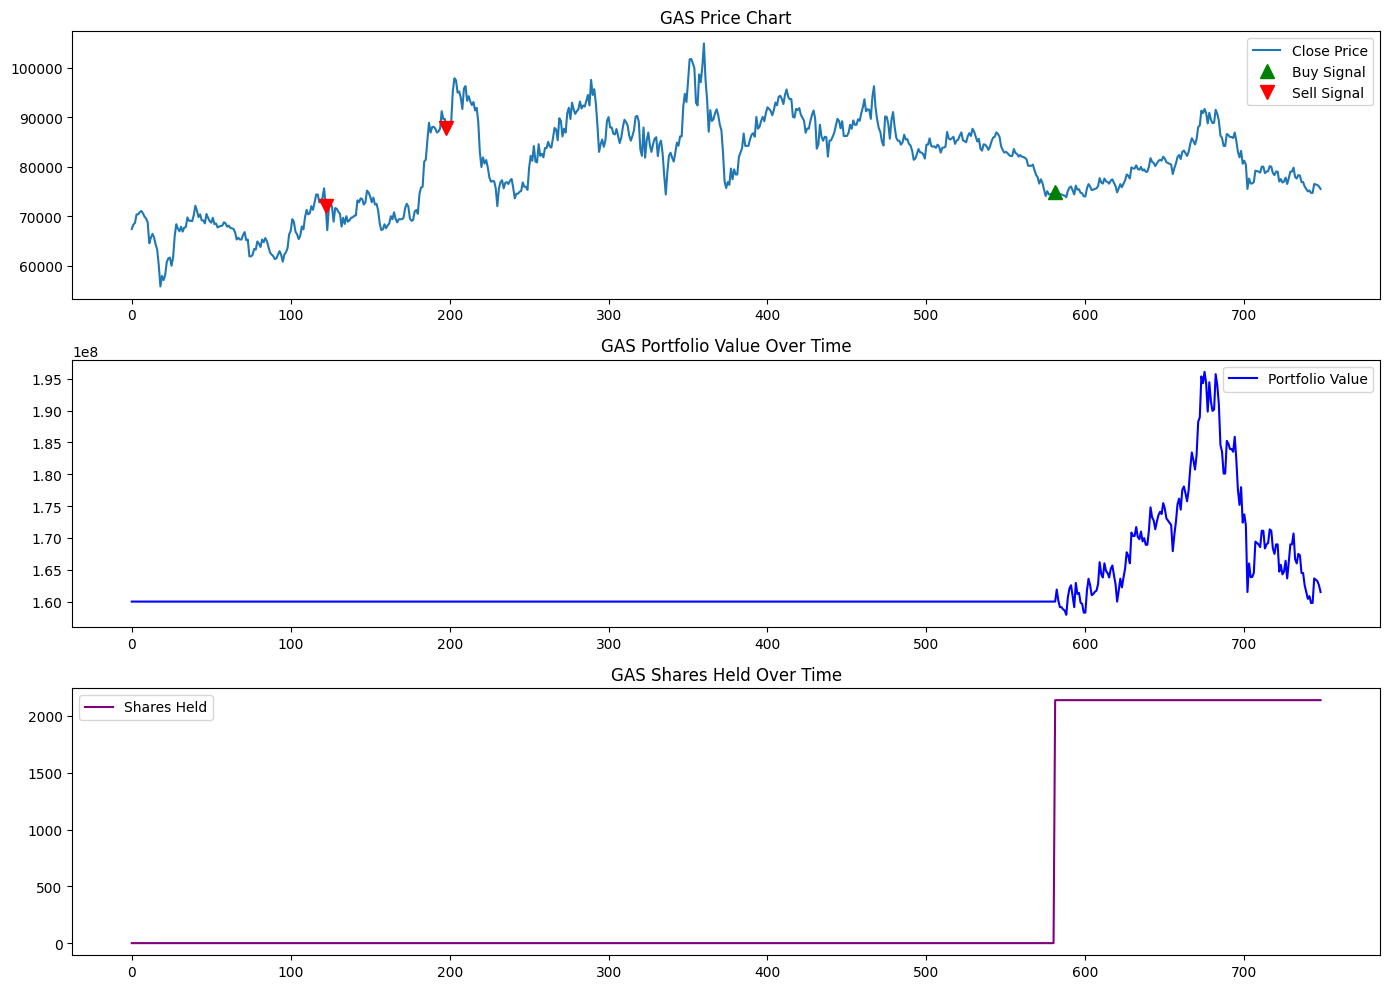

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


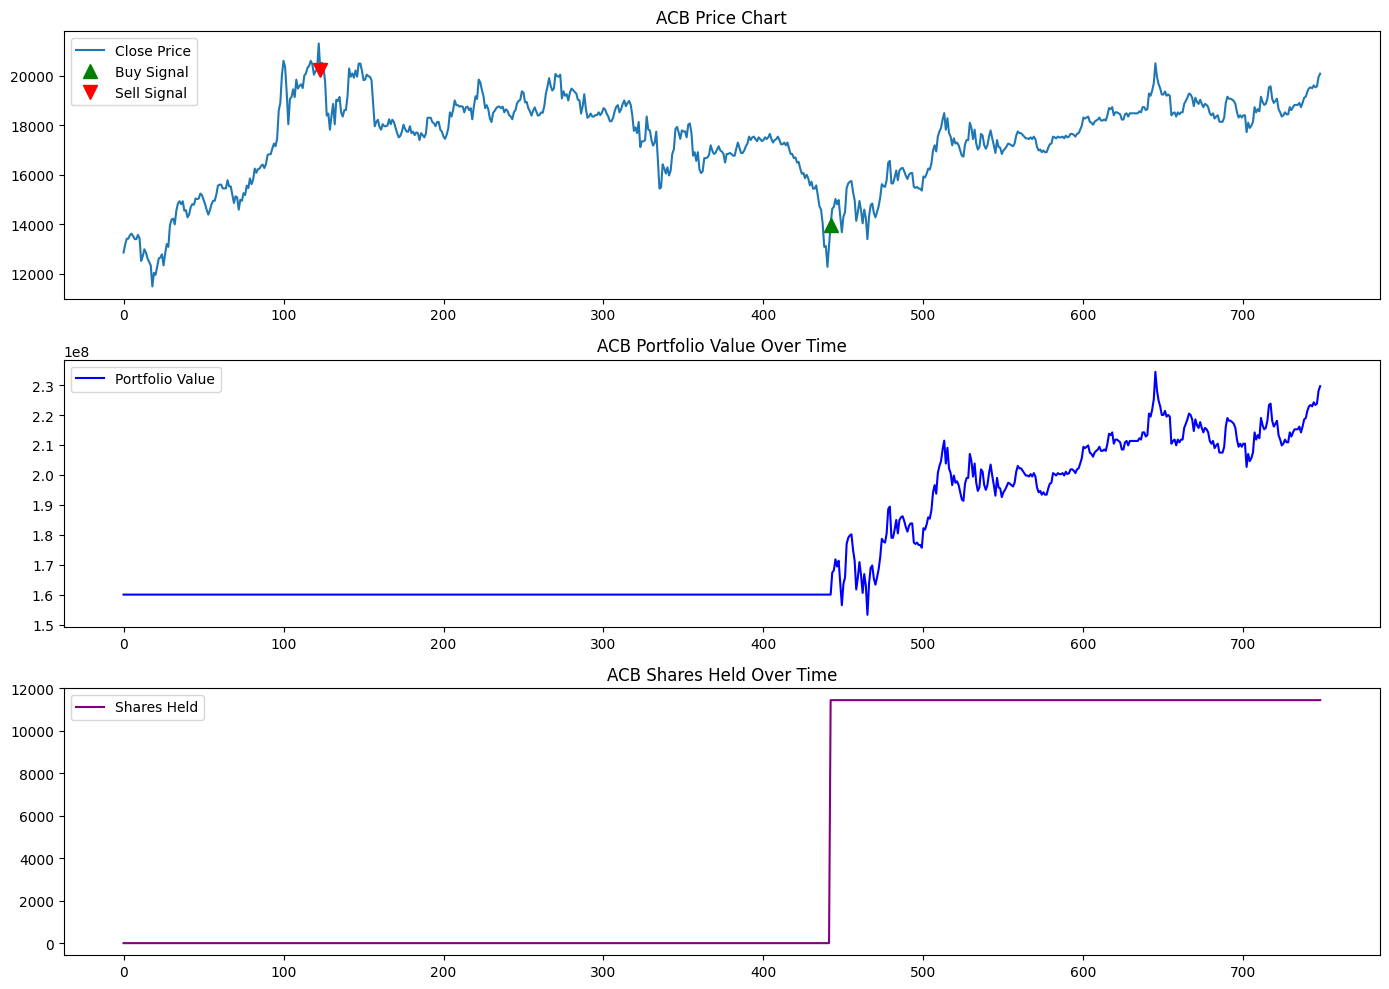

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


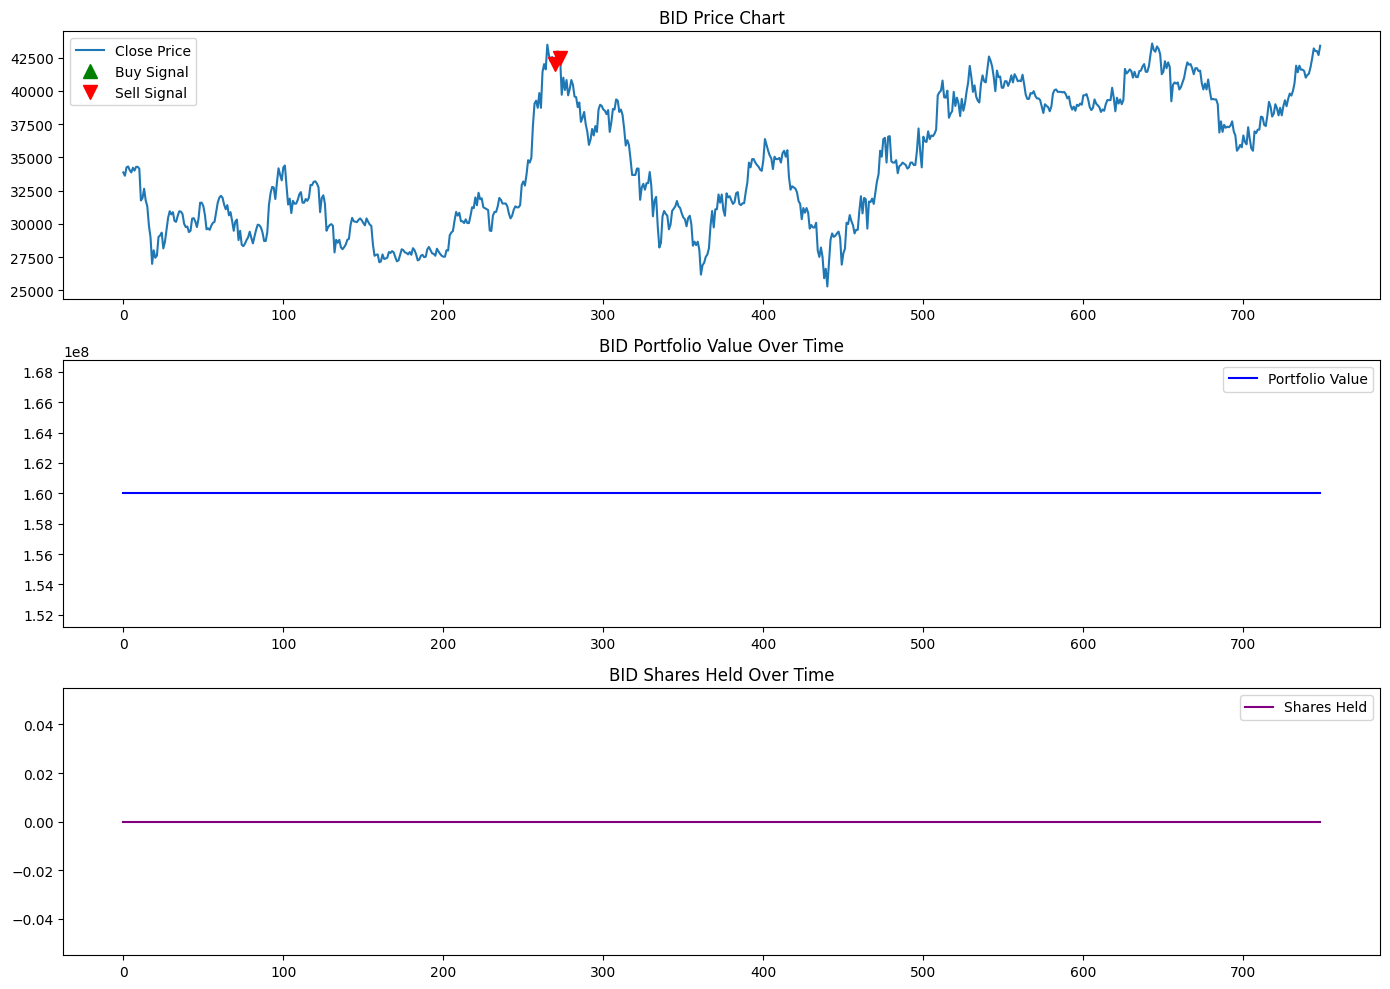

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


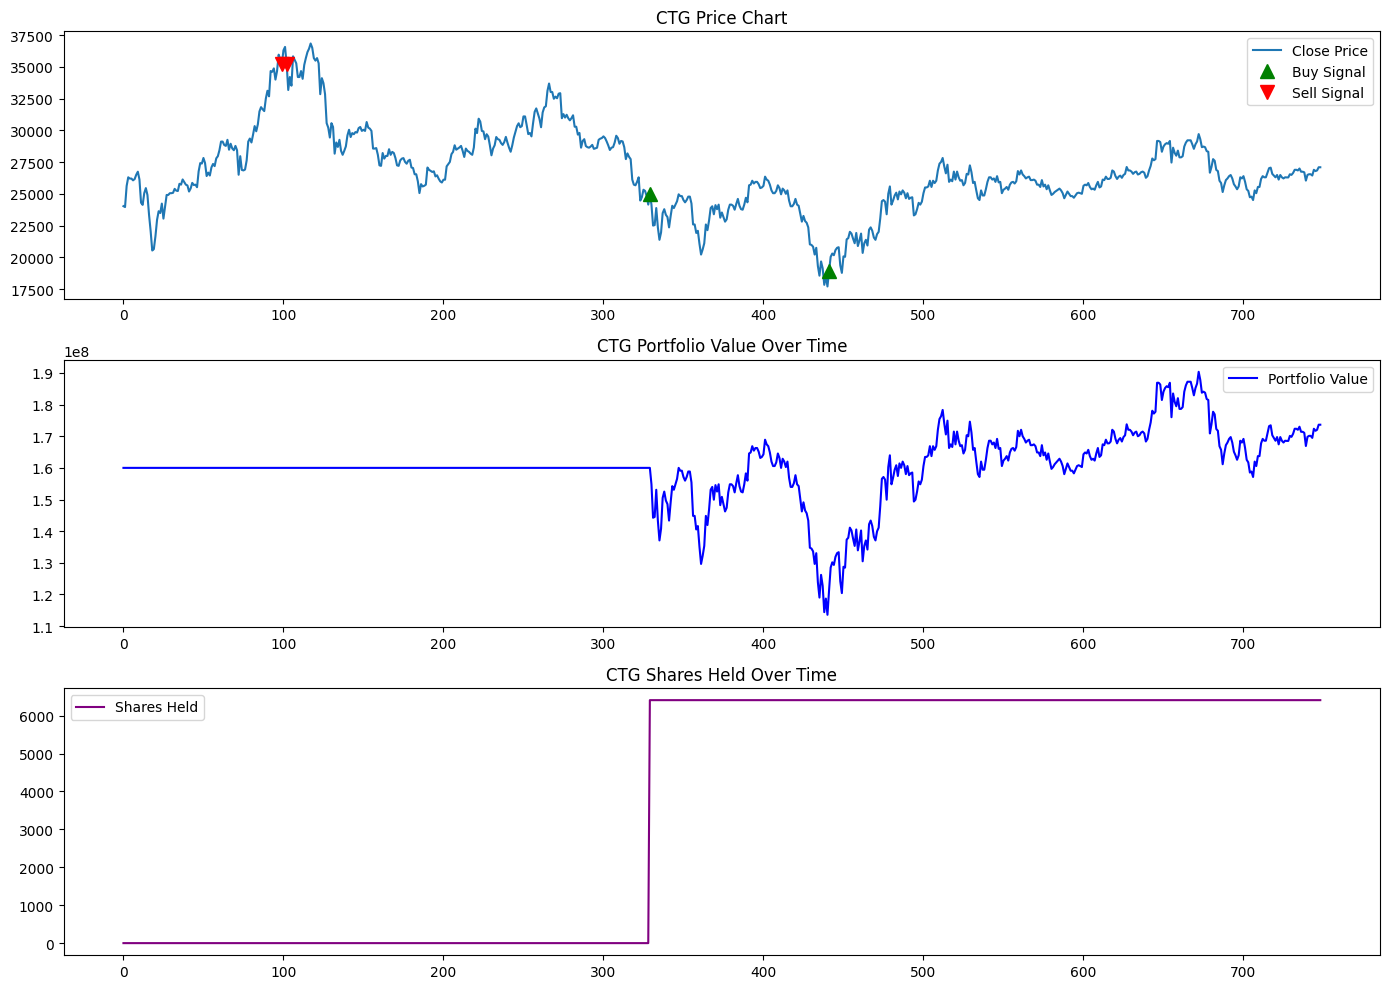

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


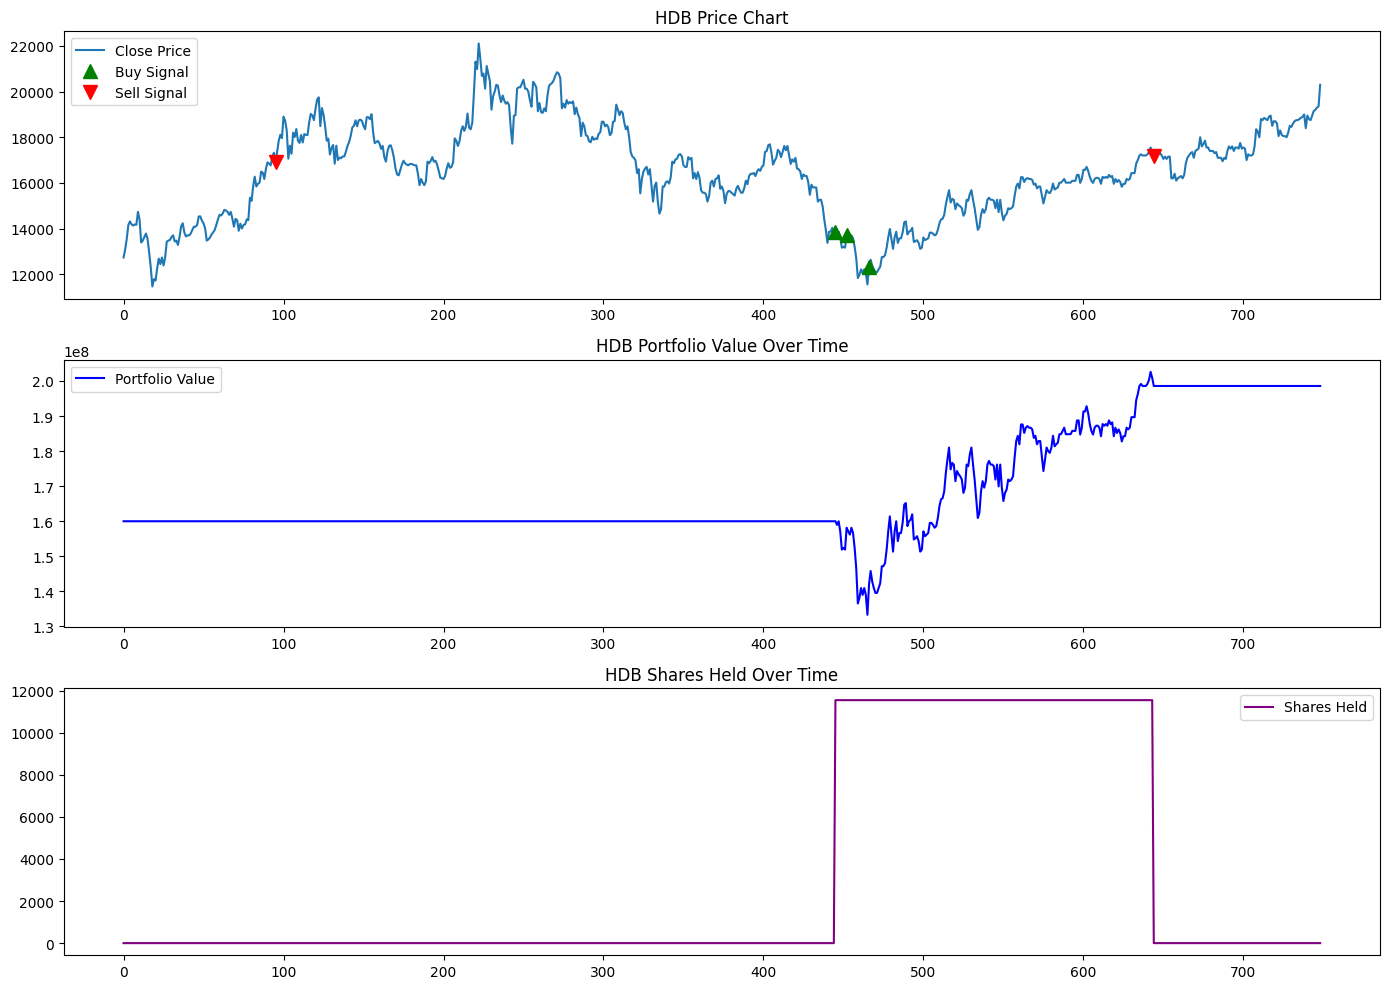

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


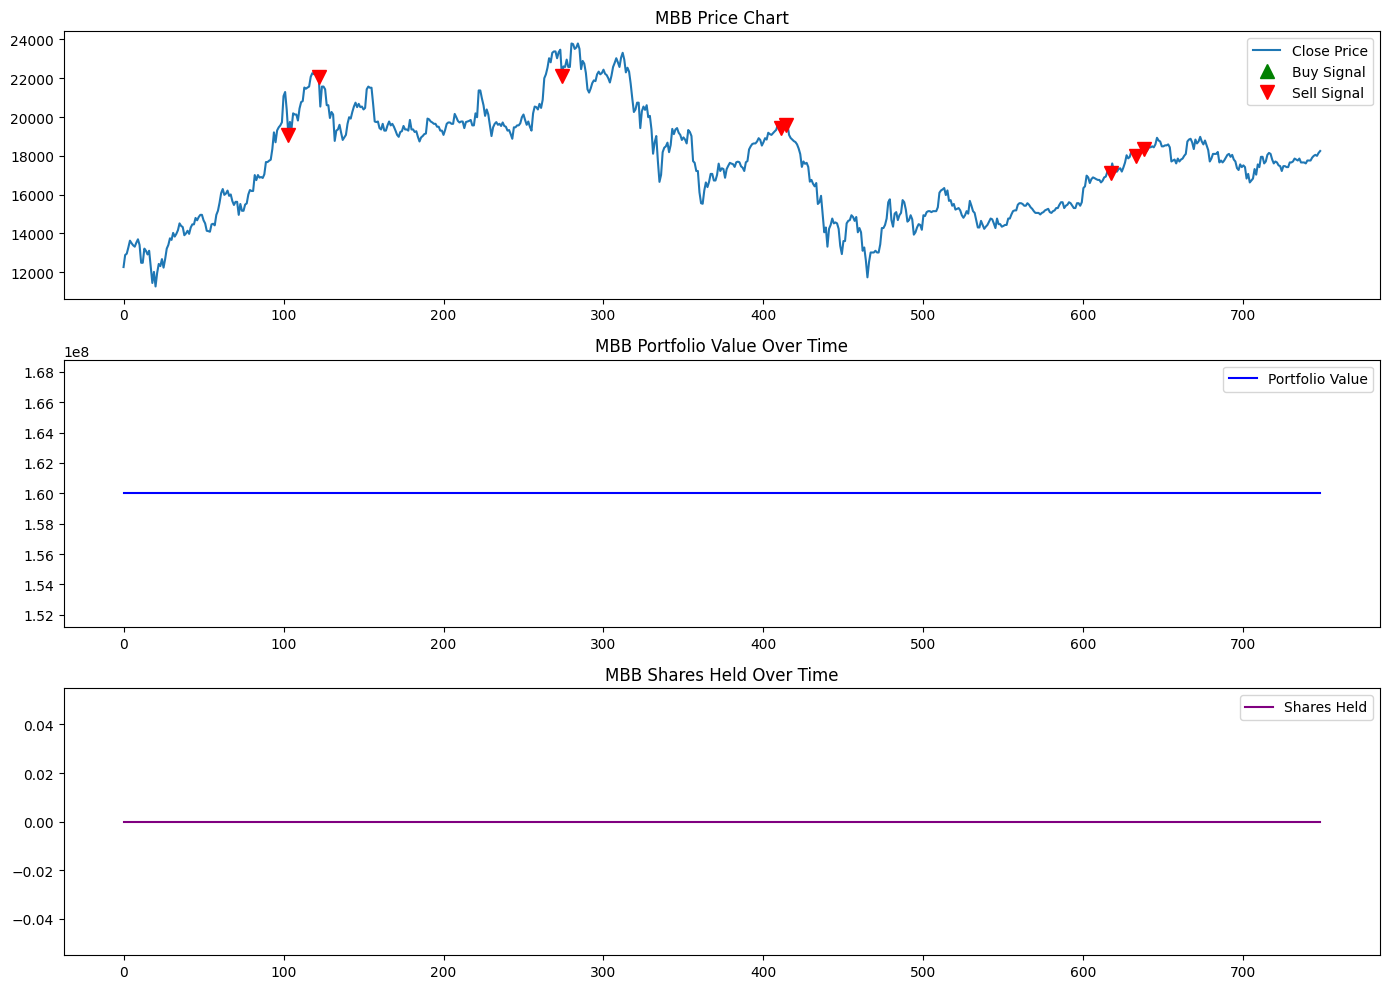

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


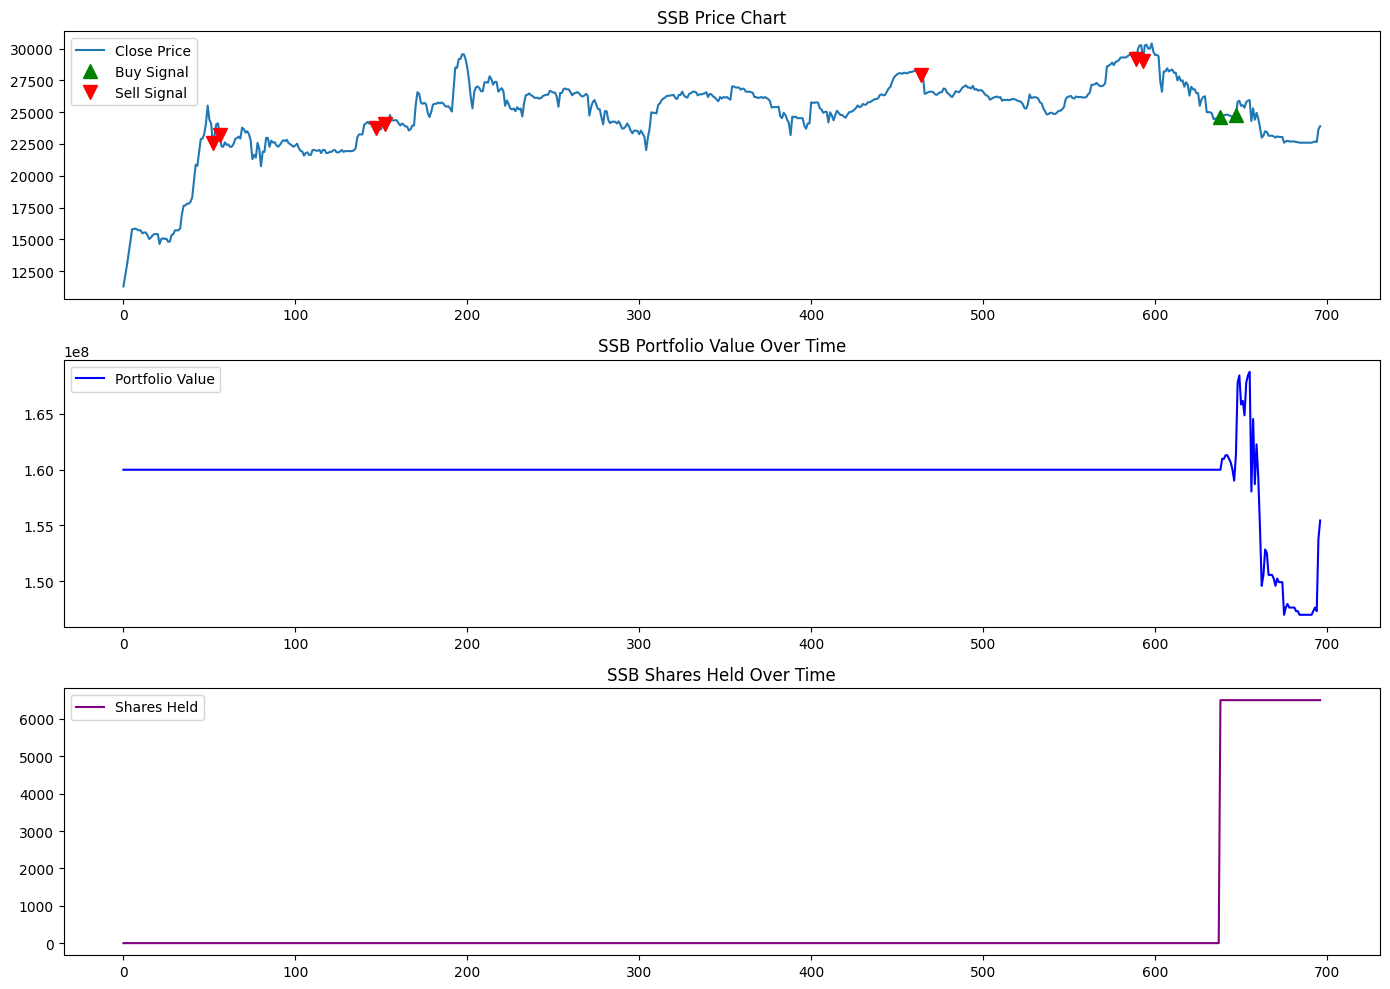

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


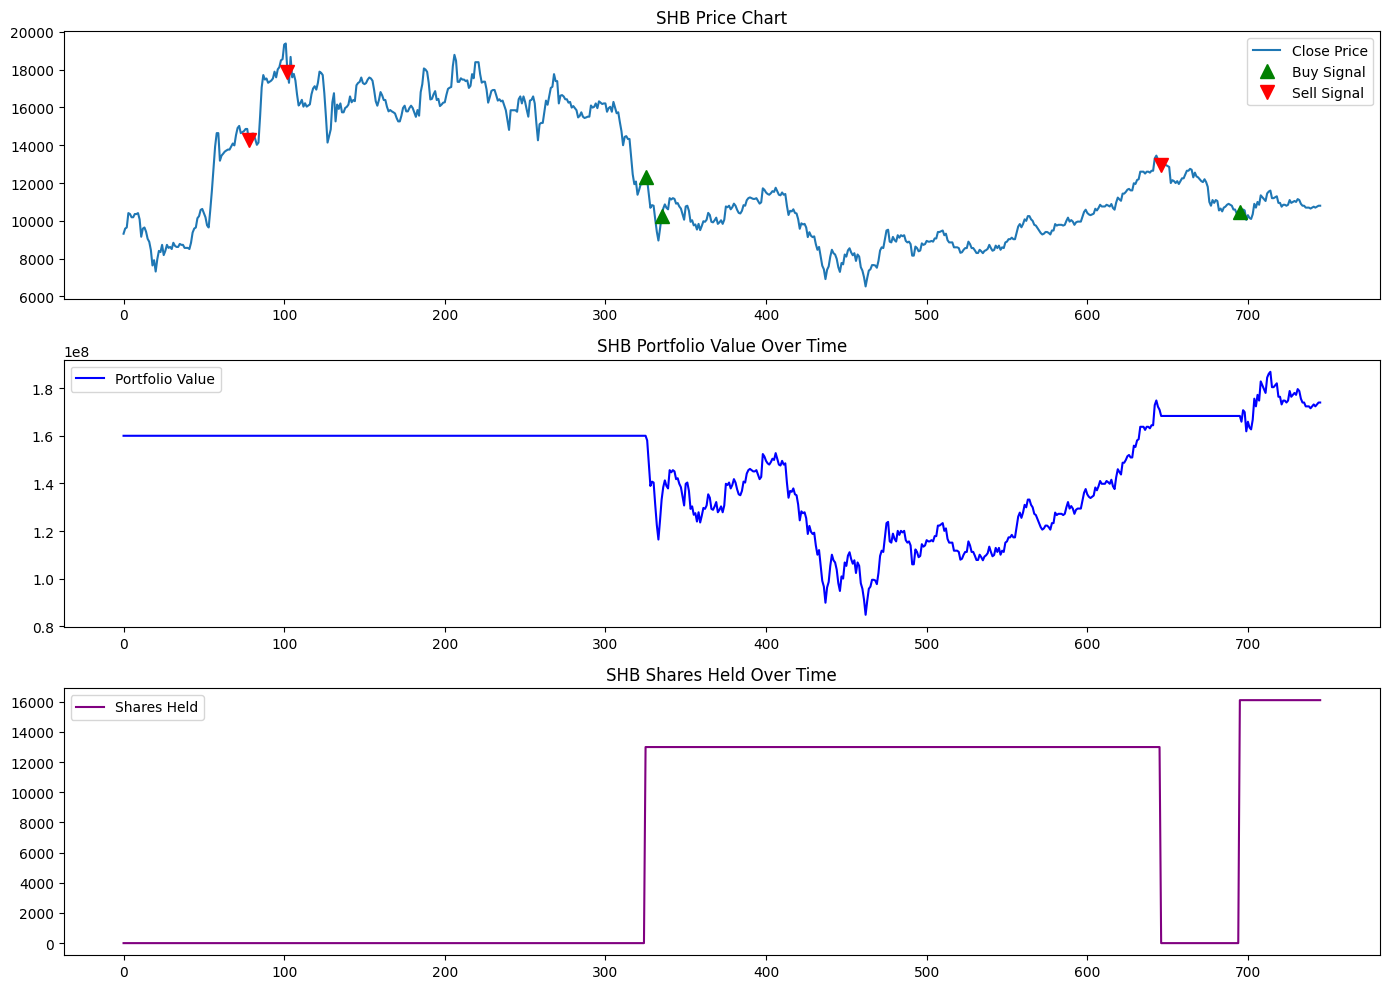

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


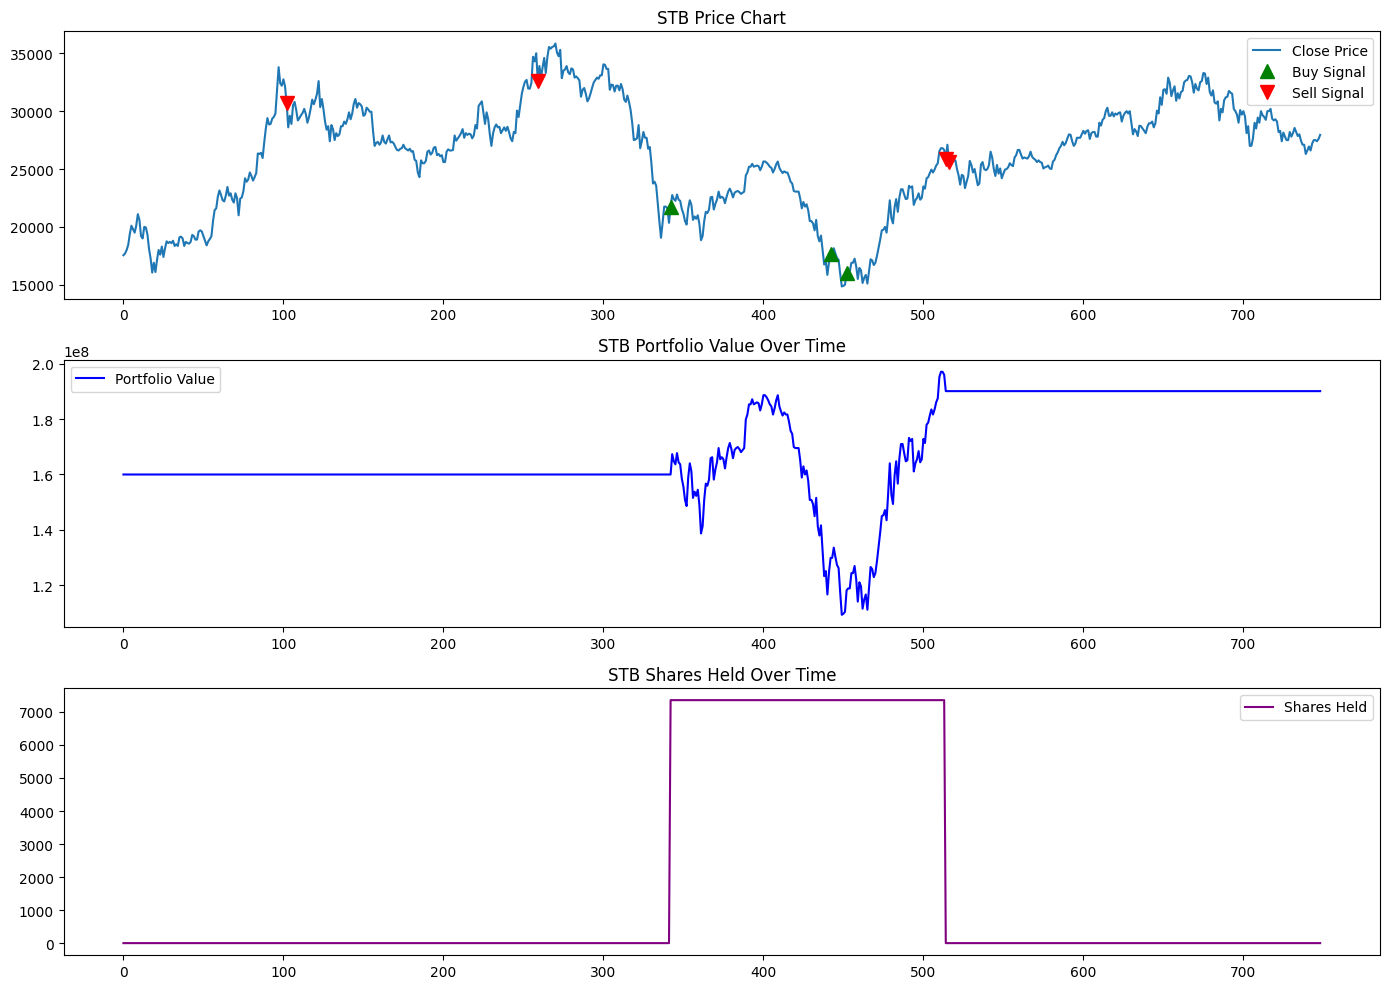

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


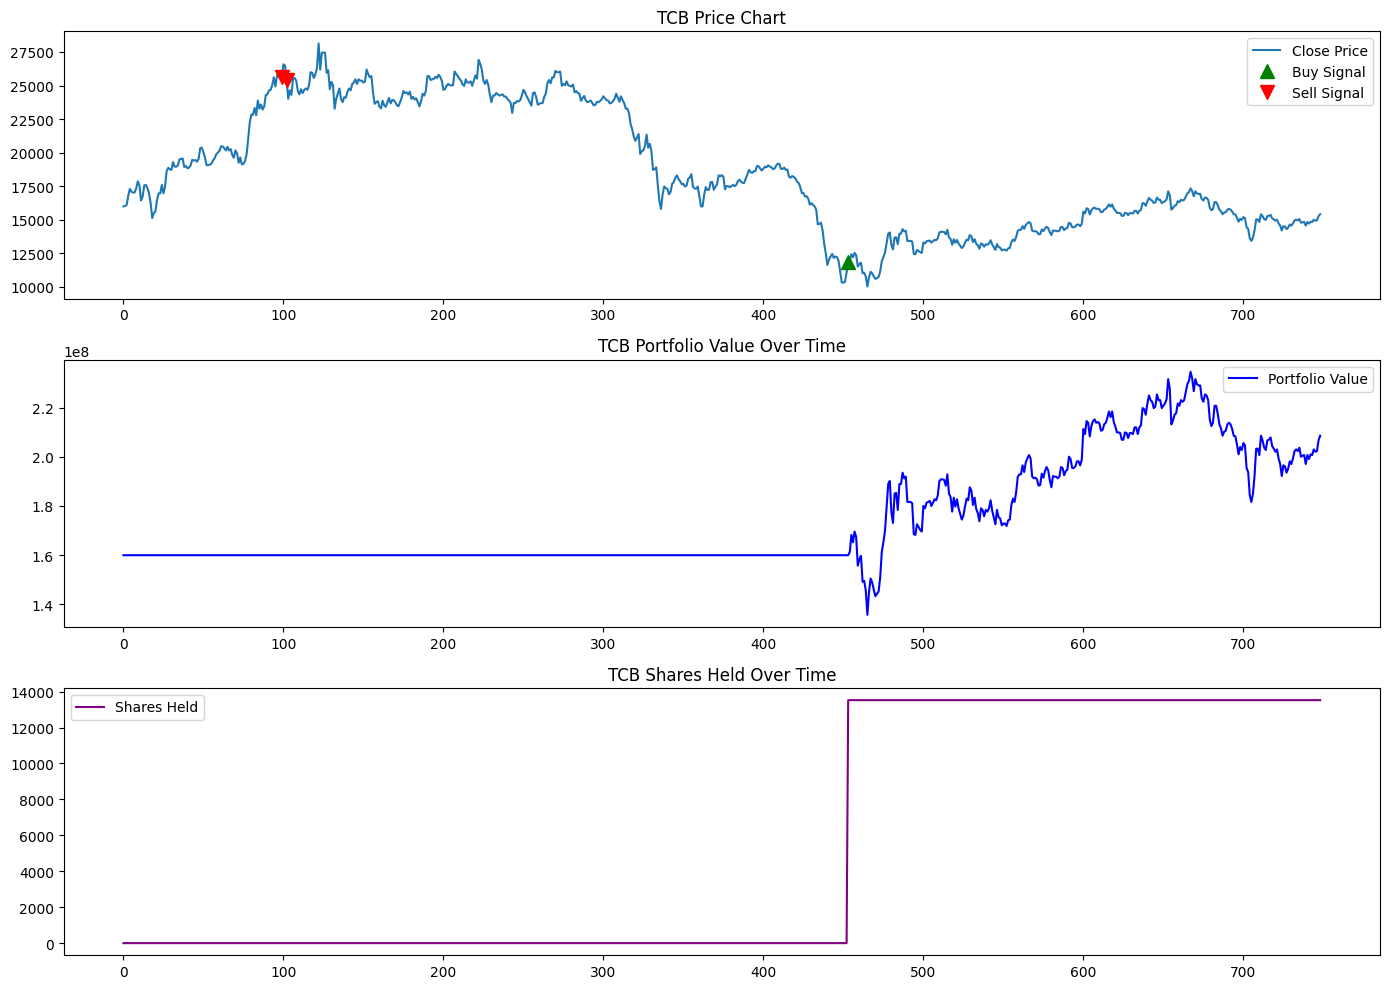

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


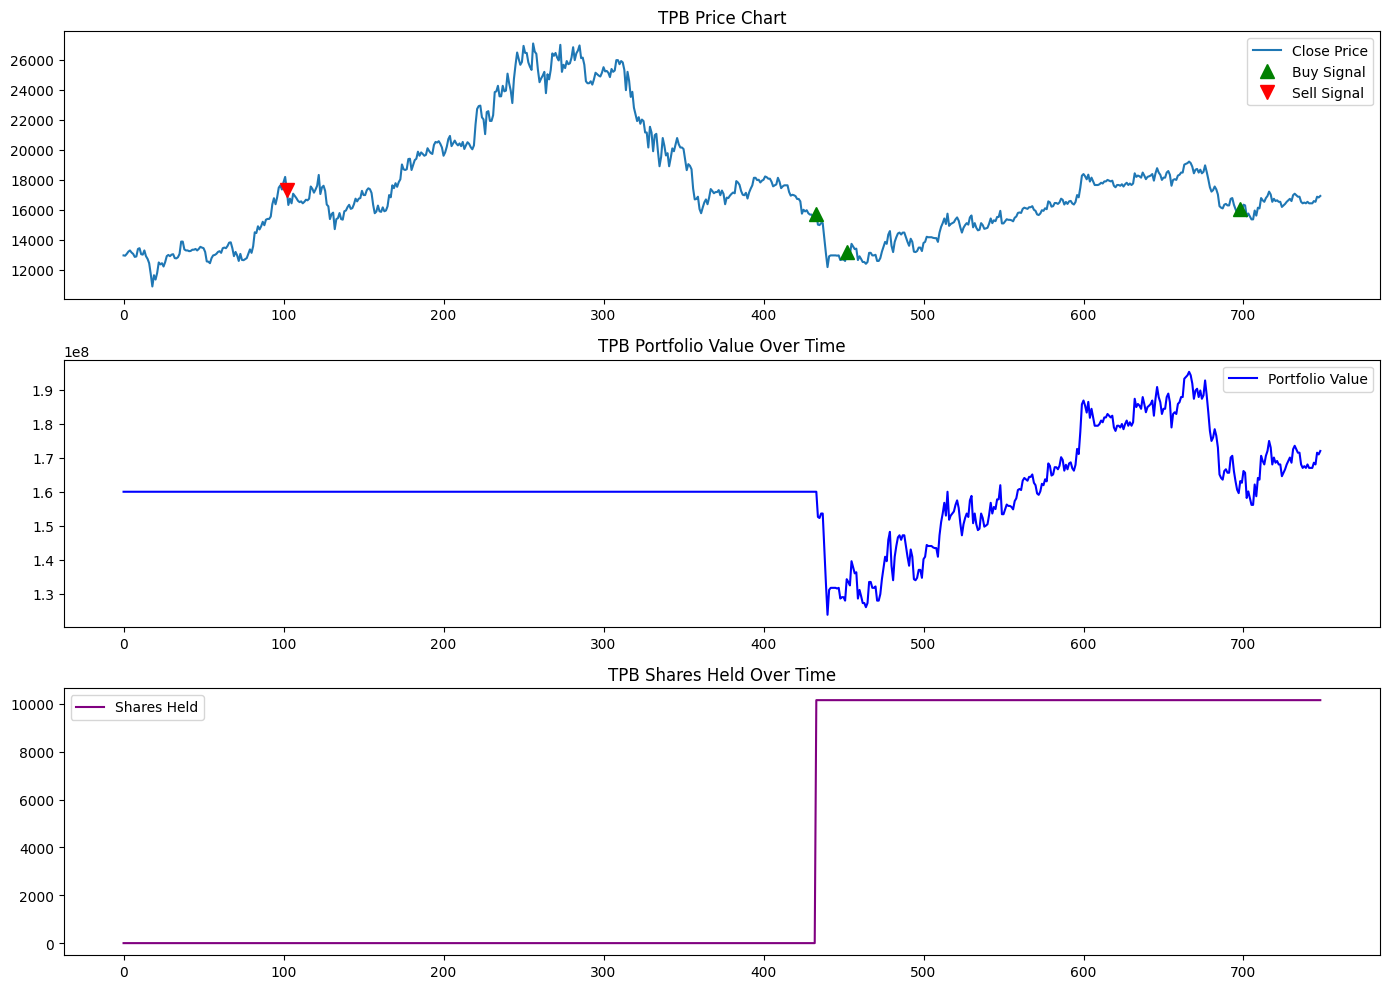

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


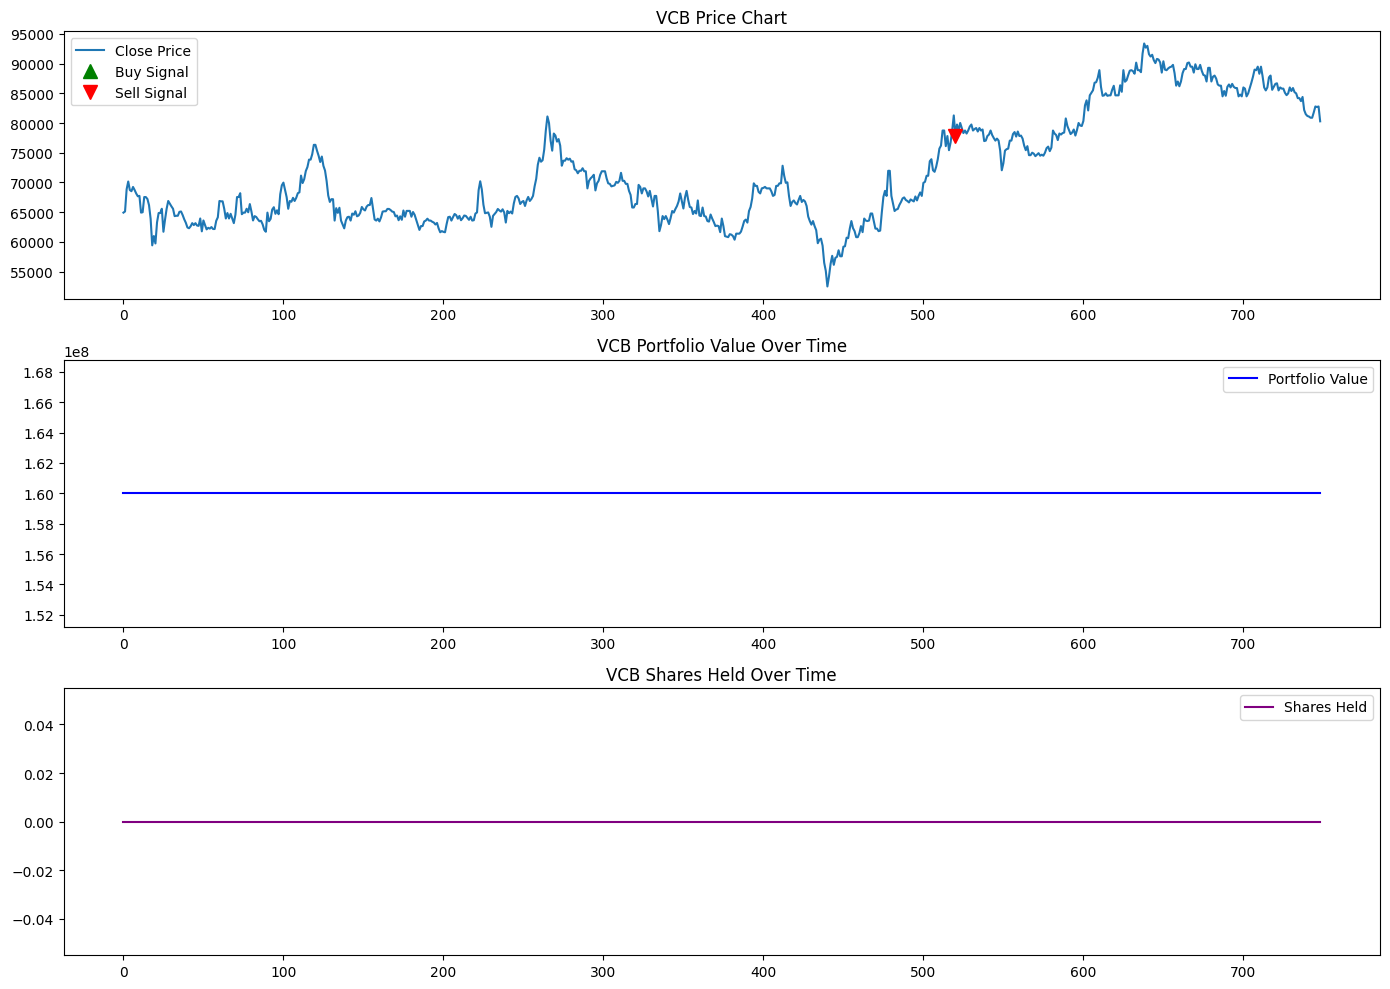

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


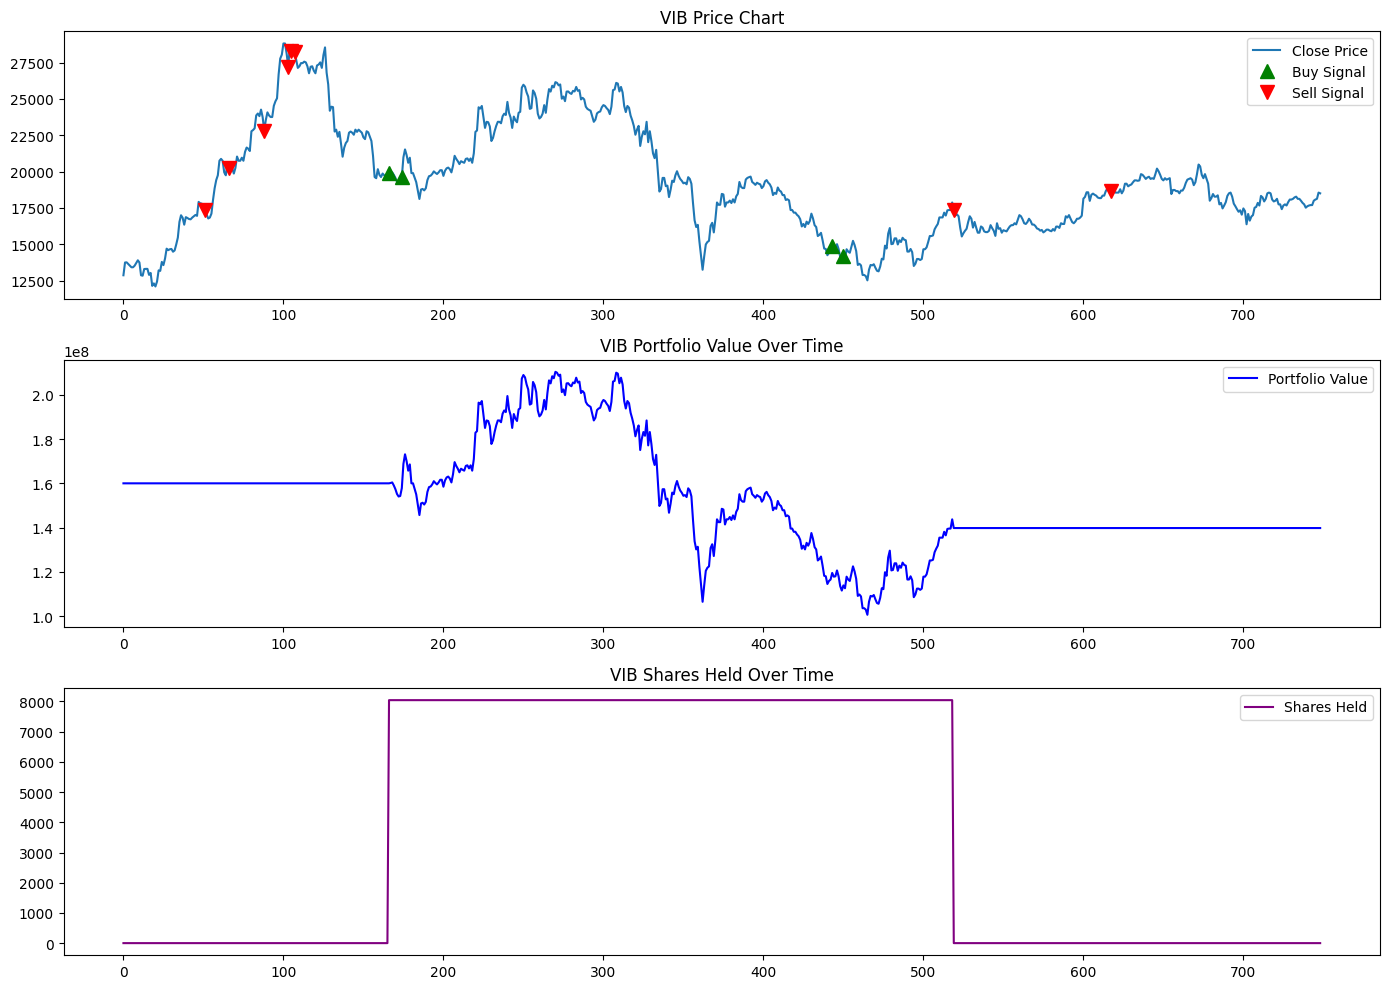

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


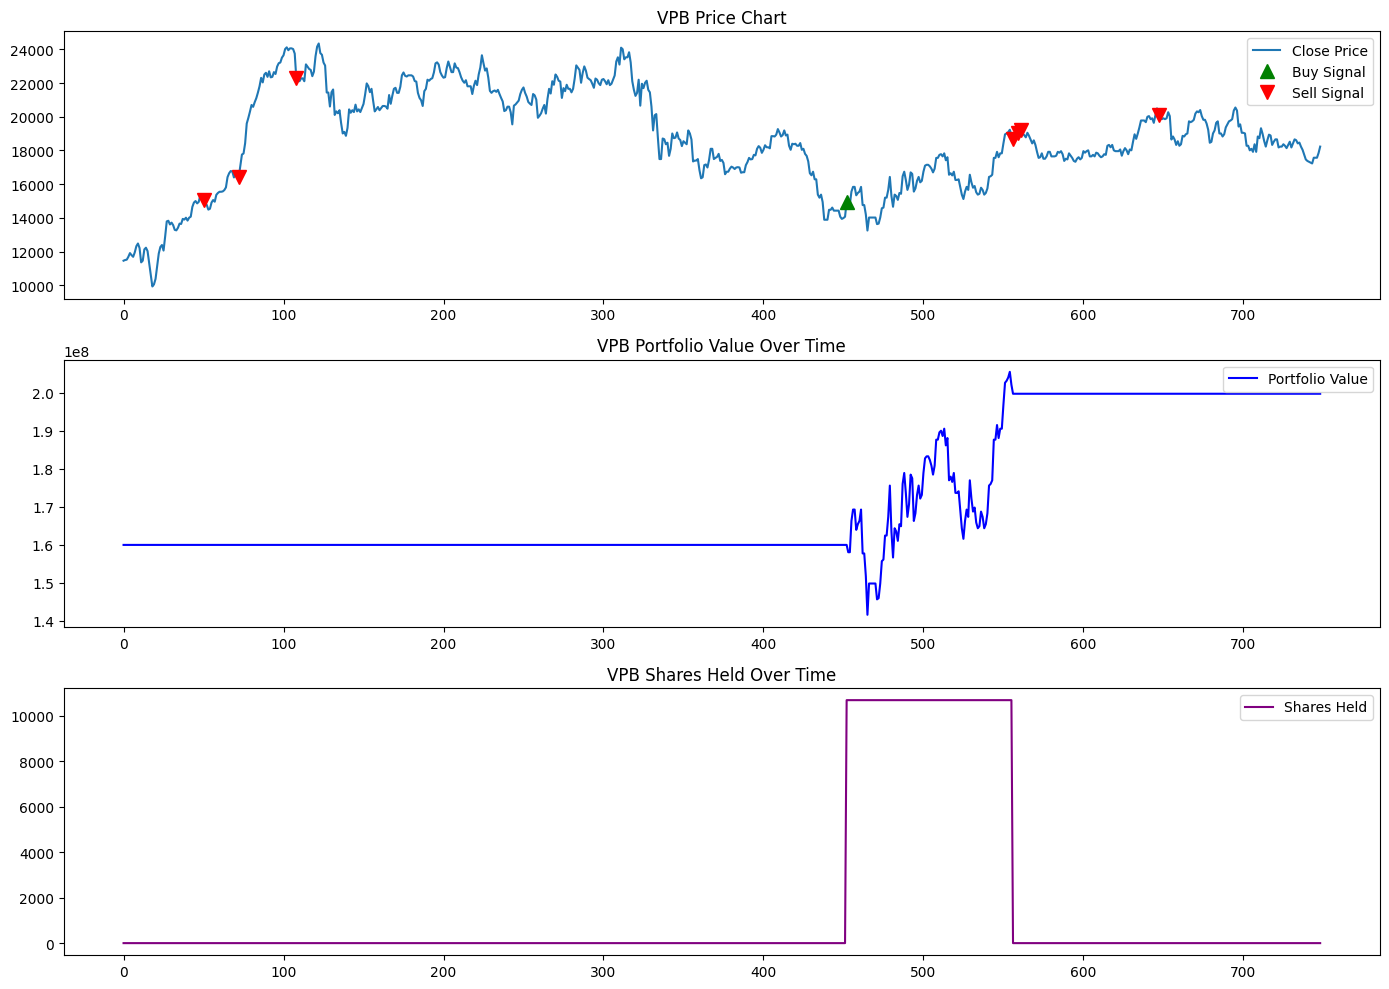

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


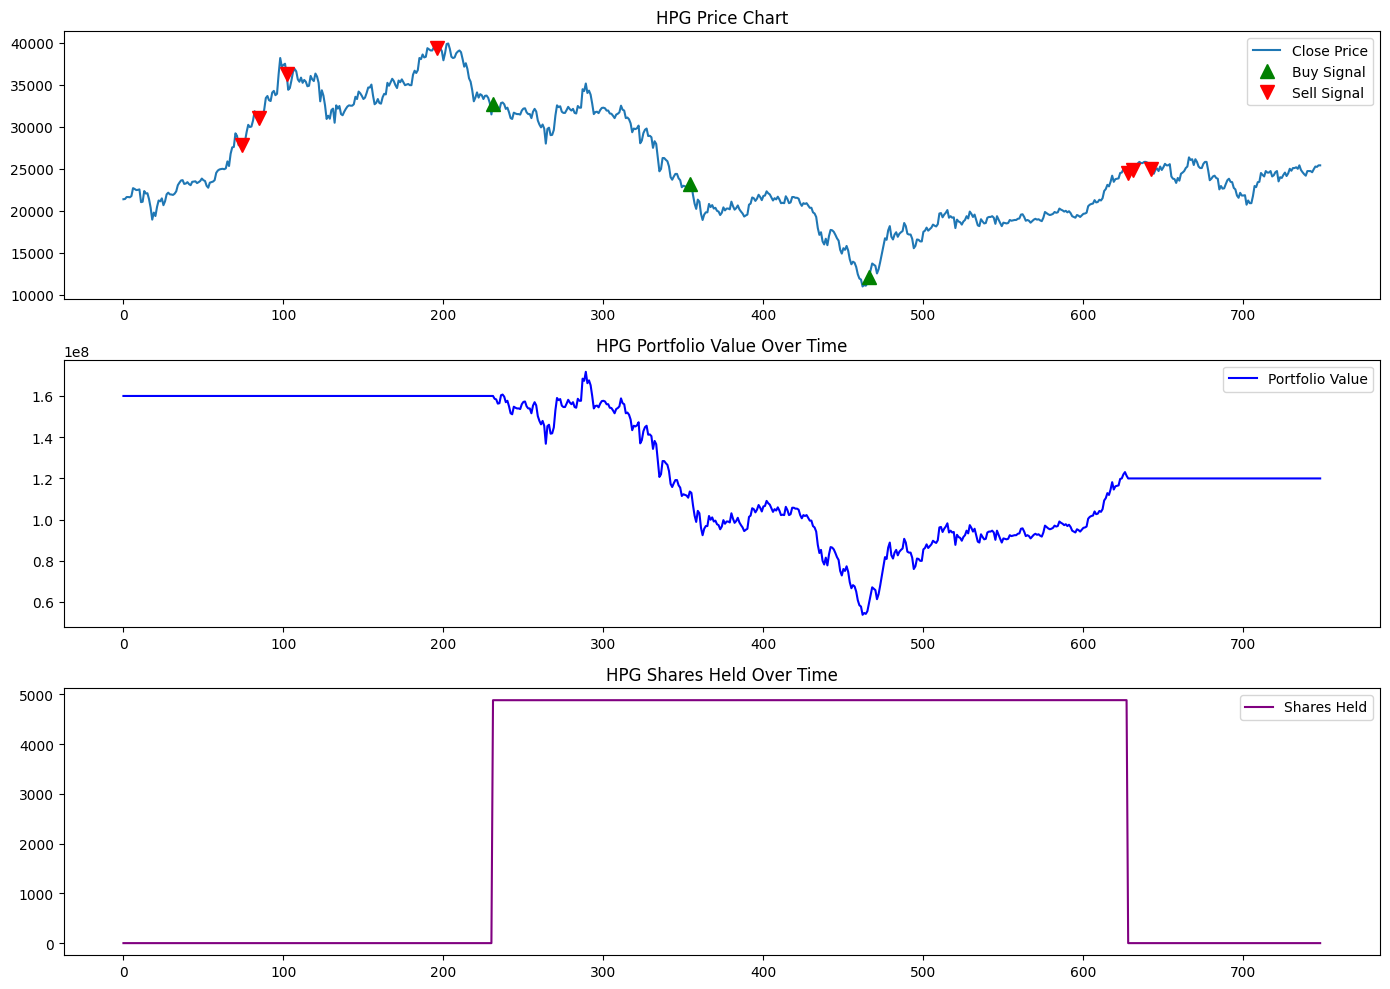

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


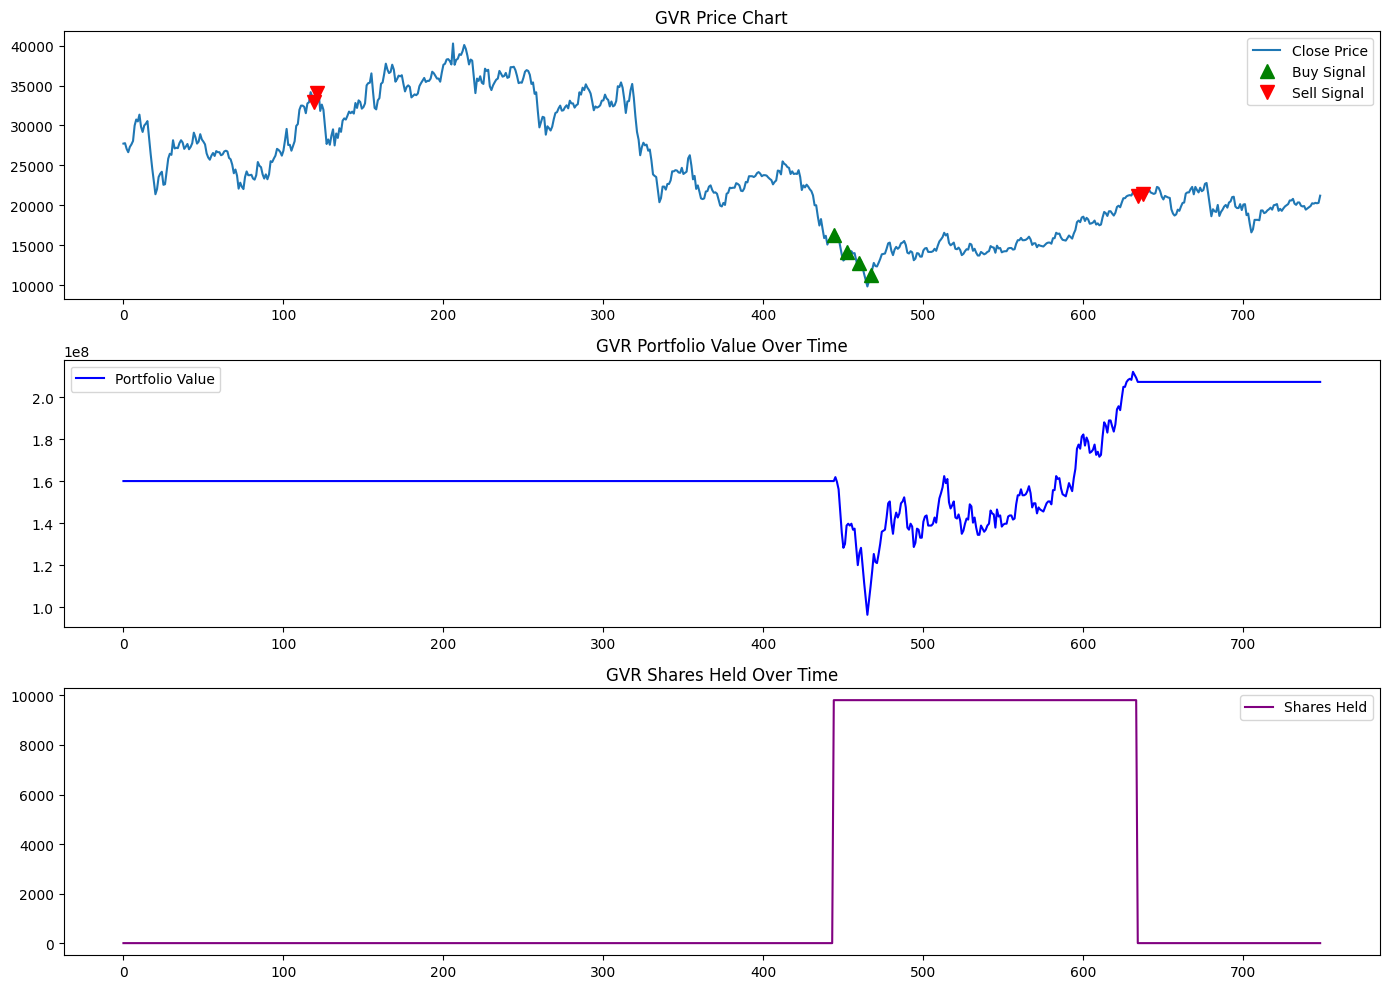

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


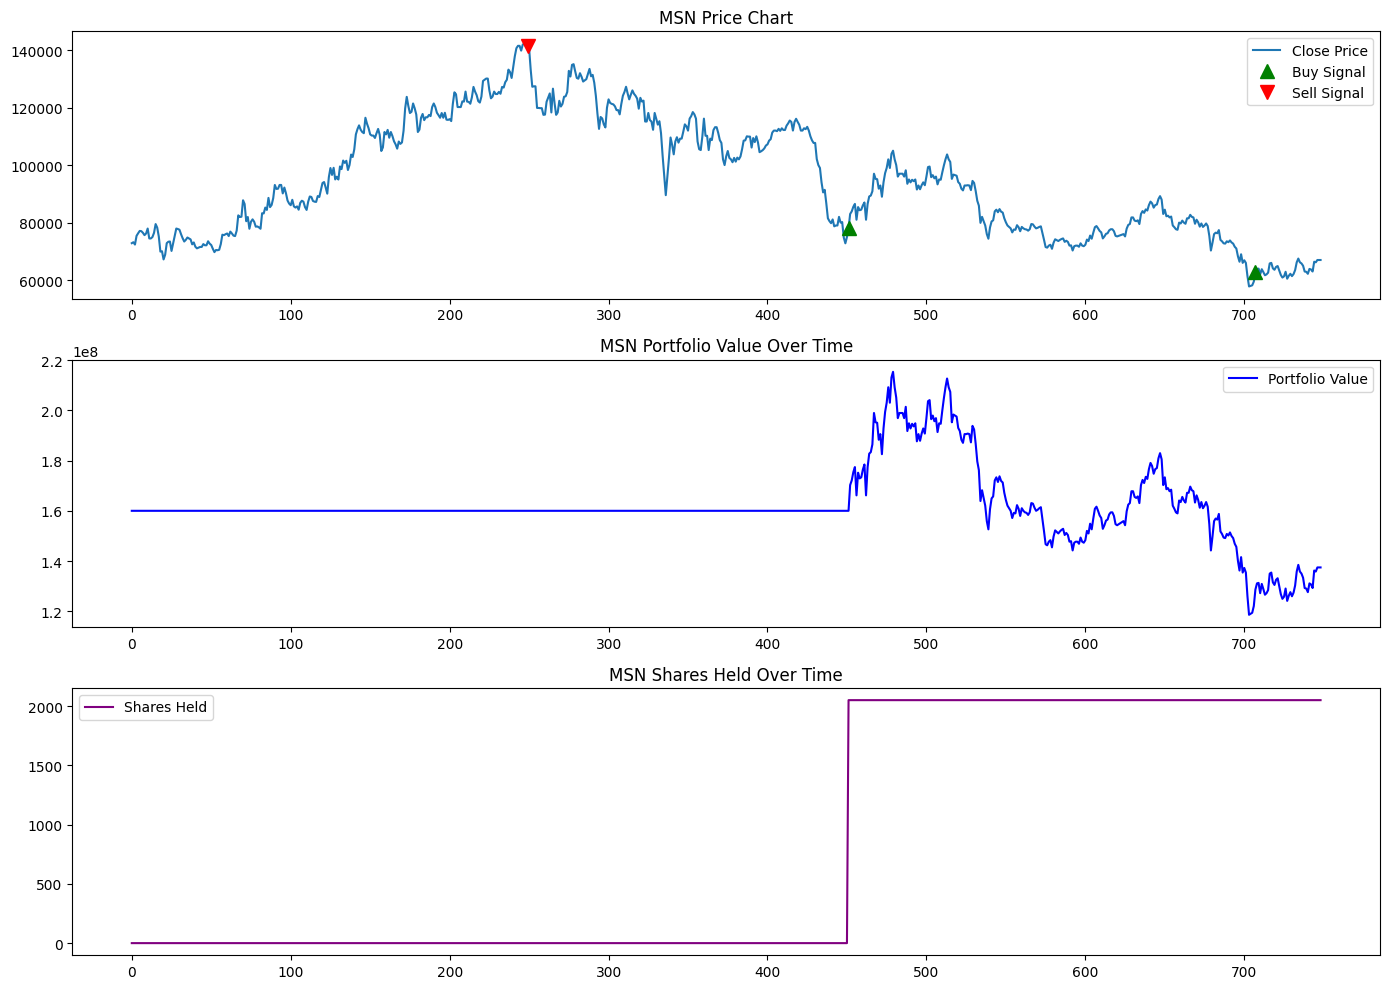

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


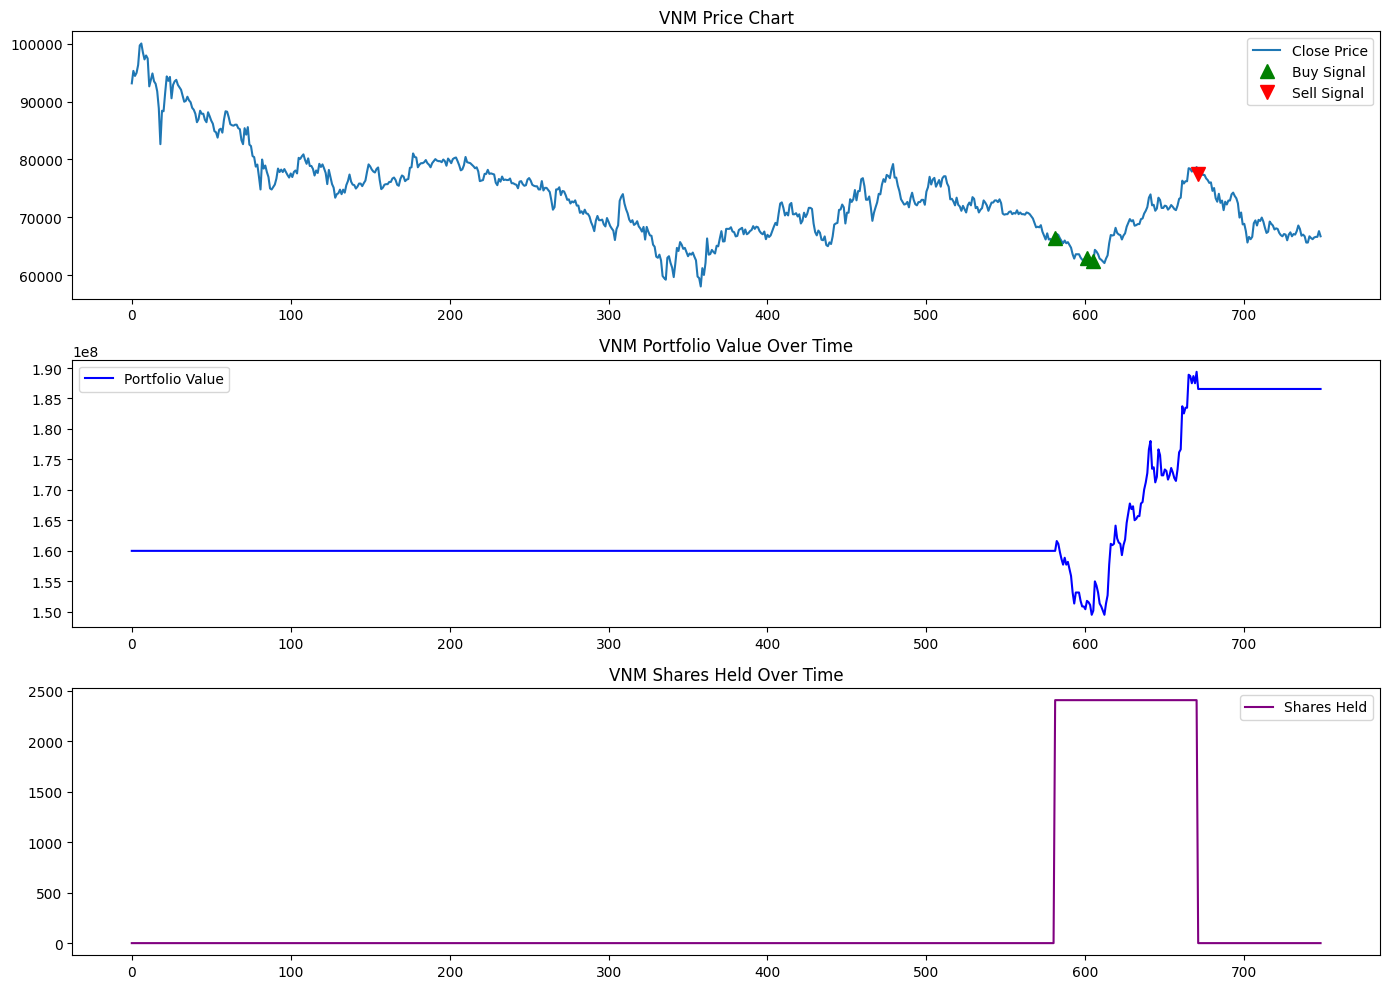

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


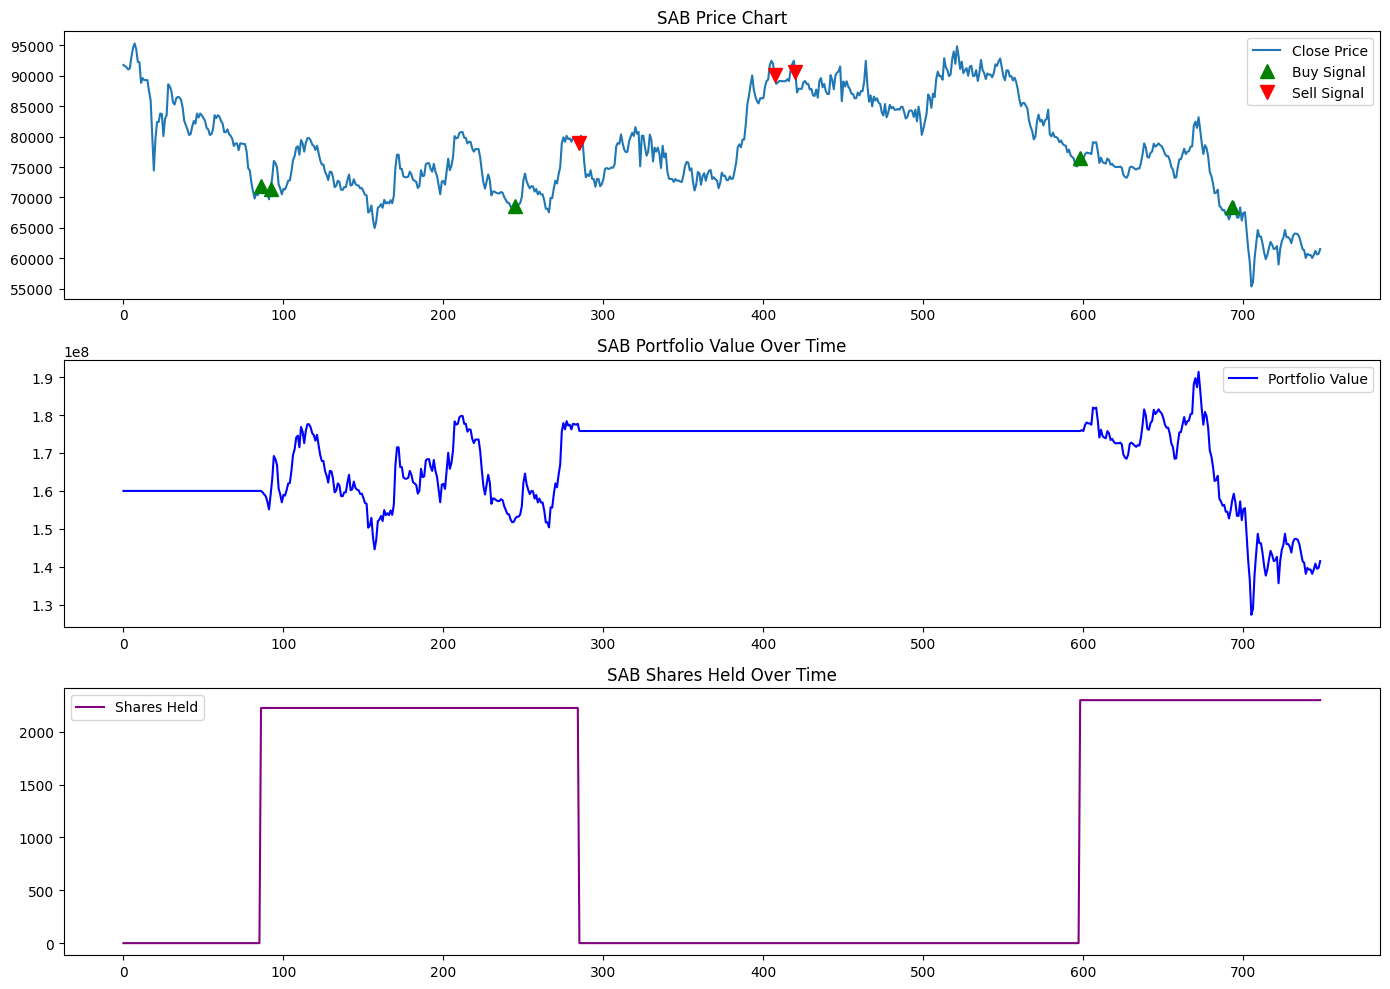

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


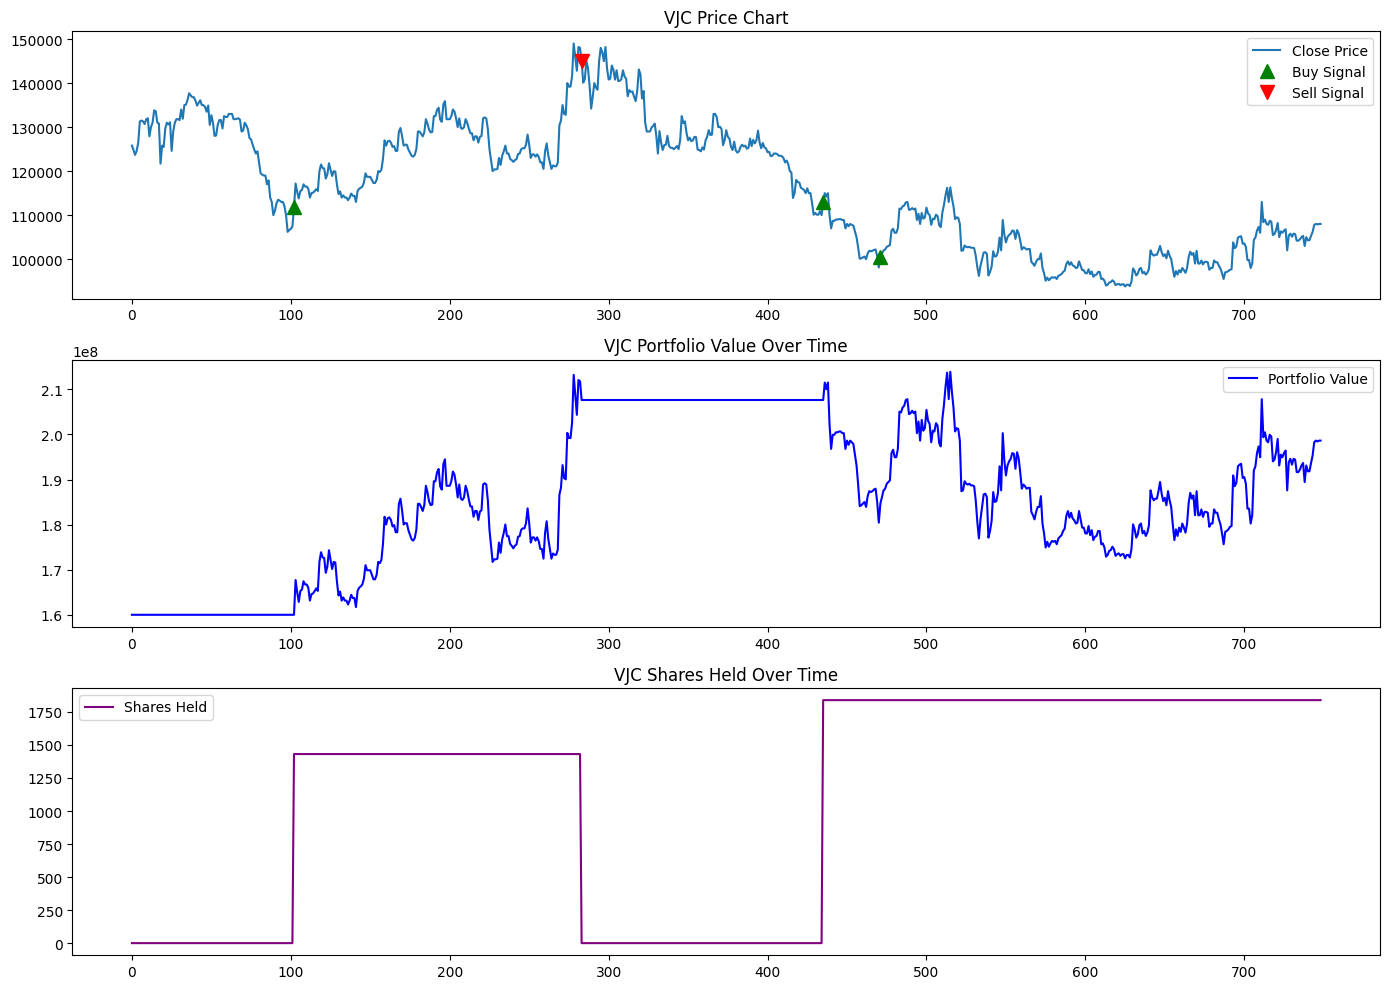

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


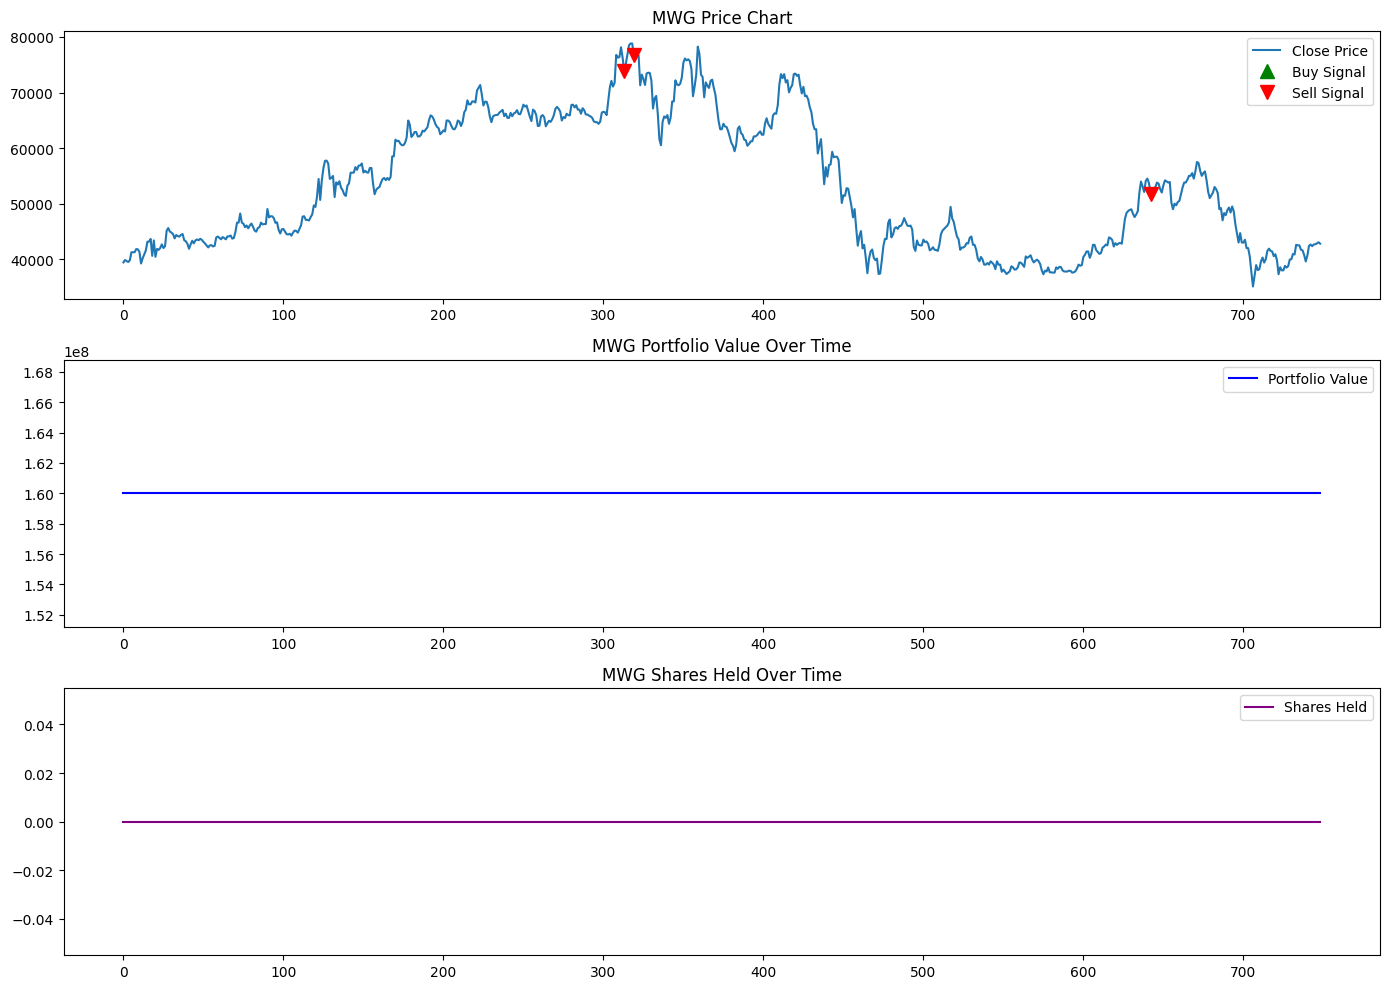

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


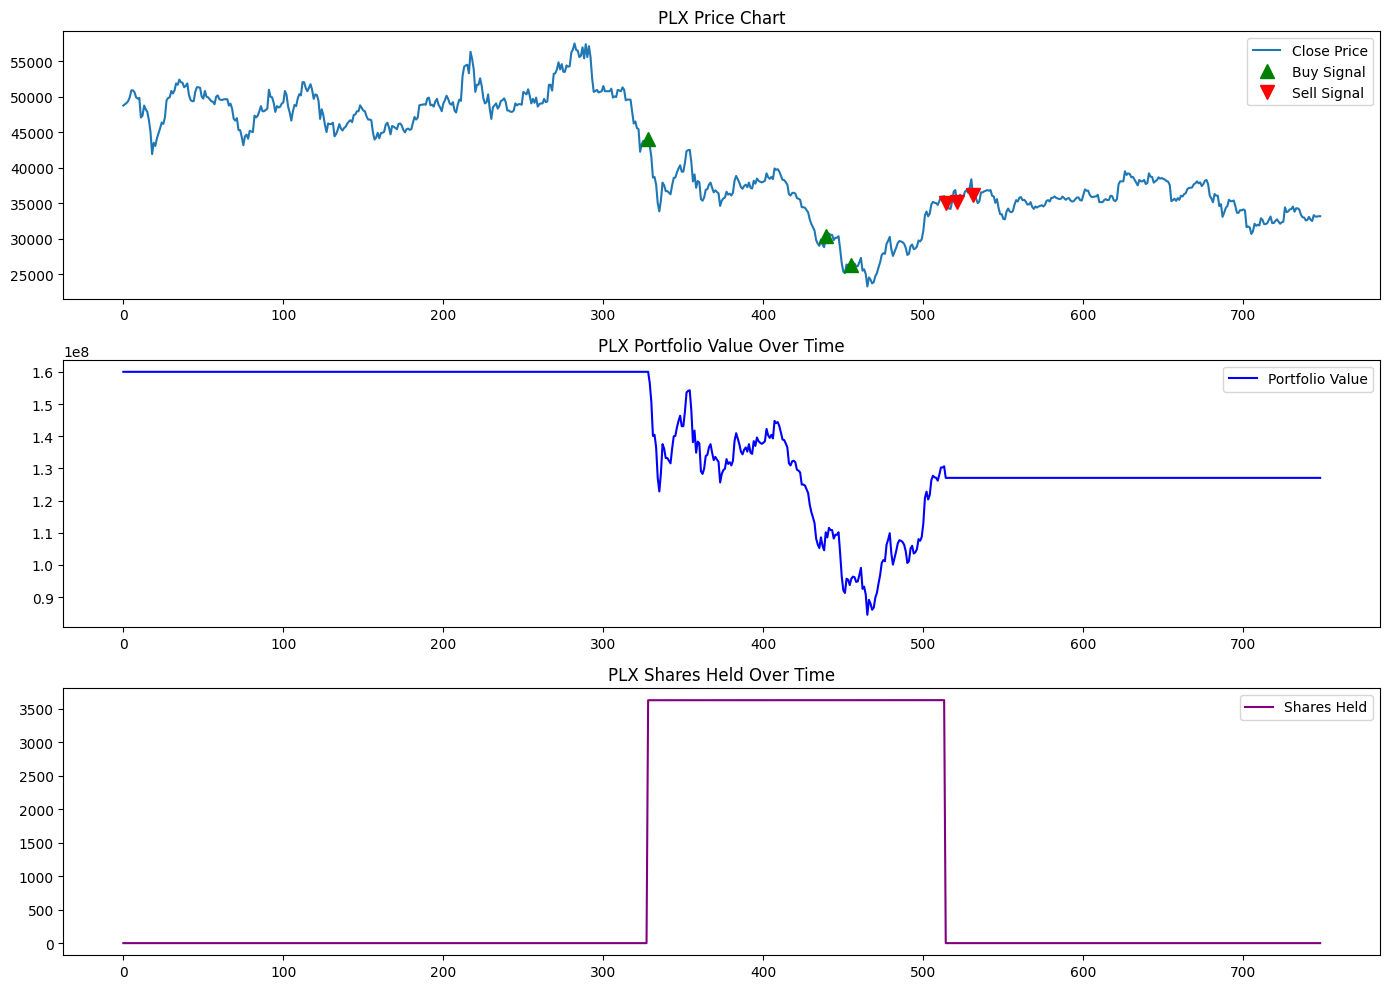

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


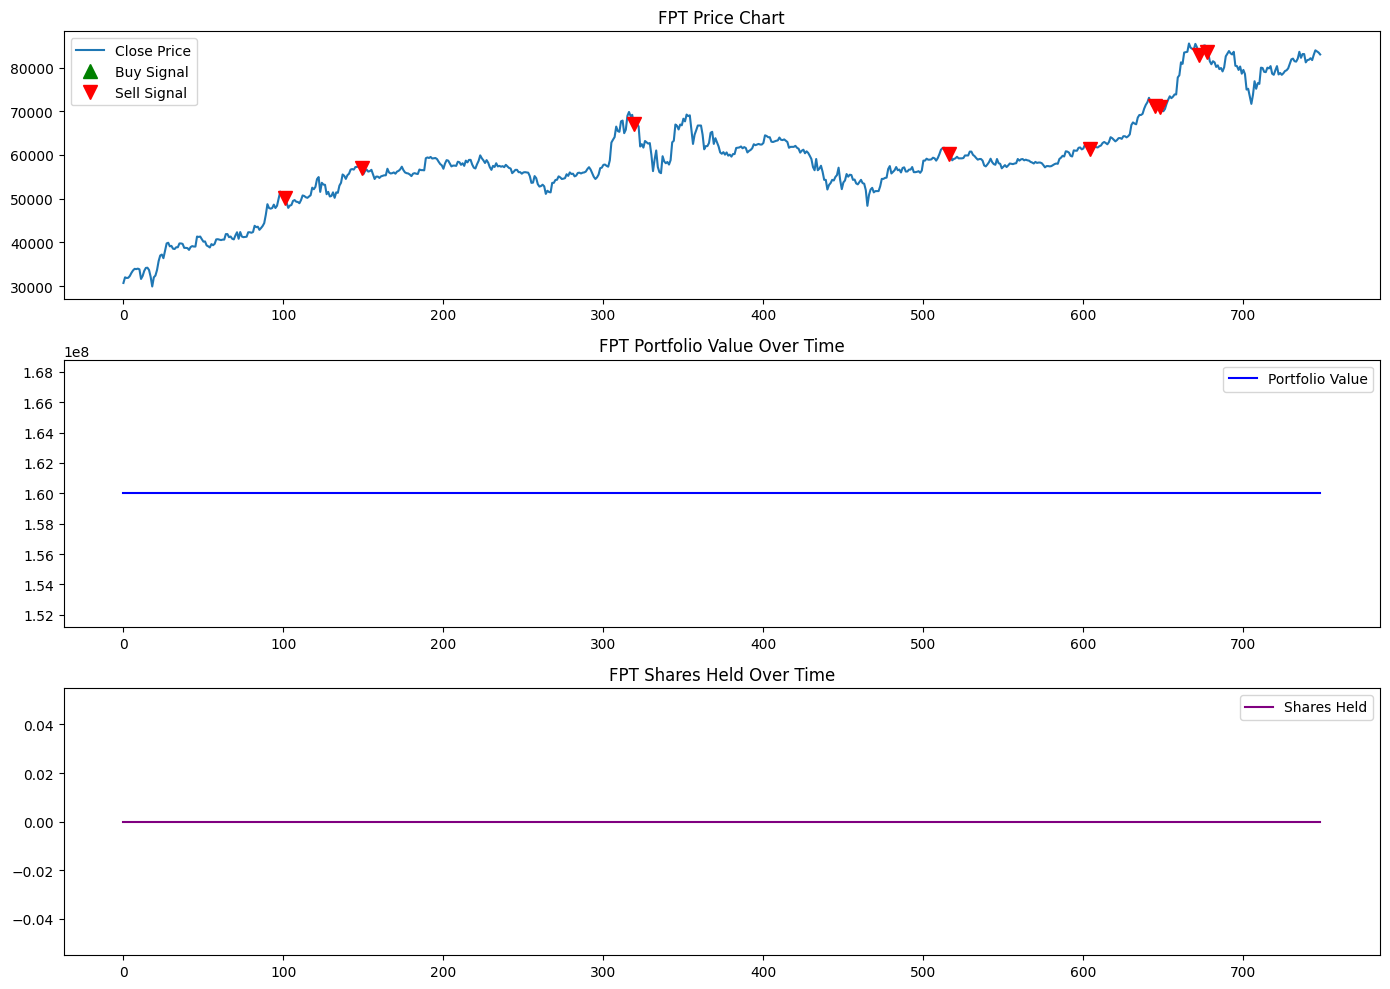

In [12]:
profit_all = {}

for company in VN30_list:
    try:
        company_data_all = test_company(company, start_date=START_DATE, end_date=END_DATE, resolution='1D', type='stock')
       
        # Update dictionaries
        profit_all[company] = company_data_all

    except Exception as e:
        print(f"Error occurred for {company}: {e}")

In [13]:
profit_all_df = pd.DataFrame.from_dict(profit_all, orient='index', columns=['Profit During all period']).reset_index()

In [14]:
final_result = profit_all_df.rename(columns={'index': 'Company'})
final_result.to_csv('result/rsi_impulsemacd.csv', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1442607934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous_RSI'].fillna(0, inplace=True)


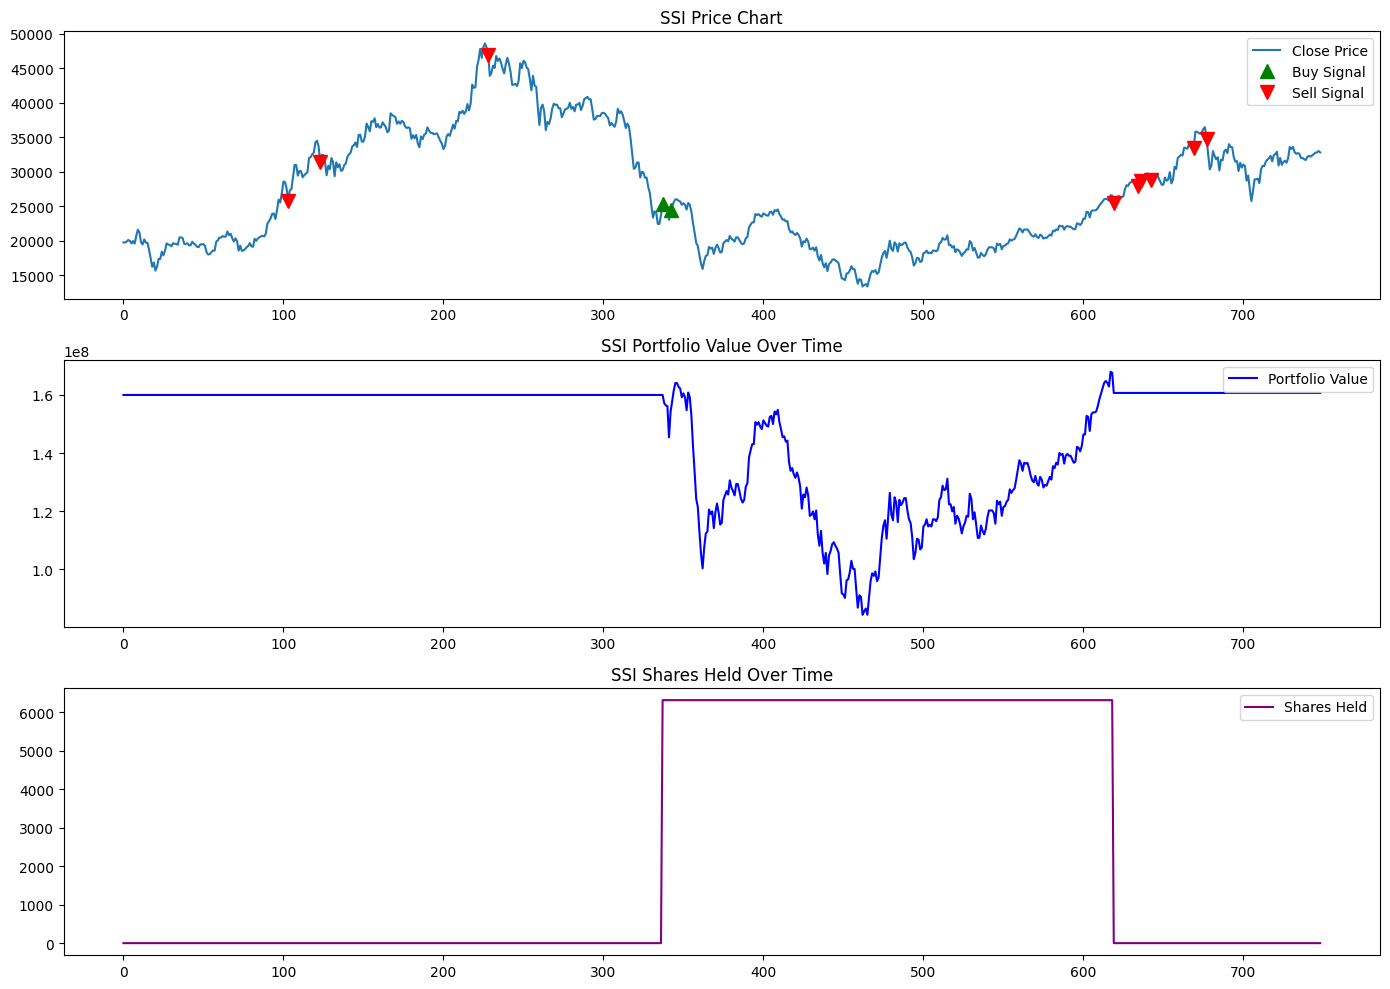

In [15]:
company_data_all = test_company('SSI', start_date=START_DATE, end_date=END_DATE, resolution='1D', type='stock')